**Task 1:** **Analytical Question**

How should investments be made in each of the 4 major sectors (energy, food, consumer, producer) during an inflation in a country?

**Task 2: Data Analysis**

Loading the dataset from Files

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Global Dataset of Inflation (2).csv to Global Dataset of Inflation (2) (1).csv


In [2]:
# importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# loading the file into a dataframe and printing first 5 rows

df = pd.read_csv('Global Dataset of Inflation (2).csv',encoding='ISO-8859-1')
df.head()

Country Code  IMF Country Code               Country Indicator Type  \
0          ABW             314.0                 Aruba      Inflation   
1          AFG             512.0           Afghanistan      Inflation   
2          AGO             614.0                Angola      Inflation   
3          ALB             914.0               Albania      Inflation   
4          ARE             466.0  United Arab Emirates      Inflation   

                         Series Name   1970   1971   1972   1973   1974  ...  \
0  Headline Consumer Price Inflation    NaN    NaN    NaN    NaN    NaN  ...   
1  Headline Consumer Price Inflation  25.51  25.51 -12.52 -10.68  10.23  ...   
2  Headline Consumer Price Inflation   7.97   5.78  15.80  15.67  27.42  ...   
3  Headline Consumer Price Inflation    NaN    NaN    NaN    NaN    NaN  ...   
4  Headline Consumer Price Inflation  21.98  21.98  21.98  21.98  21.98  ...   

    2019   2020   2021   2022                      Note  Unnamed: 59  \
0   4.26   1.22   0.74   6.04  Annual average inflation          NaN   
1   2.30   5.44   5.06    NaN  Annual average inflation          NaN   
2  17.08  21.02  23.85  21.35  Annual average inflation          NaN   
3   1.41   1.62   2.04   6.73  Annual average inflation          NaN   
4  -1.93  -2.08   0.18   5.22  Annual average inflation          NaN   

   Unnamed: 60  Unnamed: 61  Unnamed: 62  Unnamed: 63  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN  

[5 rows x 64 columns]

# Task 2.1

**Exploratory Data Analysis**

In [4]:
# printing the information of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Code      783 non-null    object 
 1   IMF Country Code  781 non-null    float64
 2   Country           783 non-null    object 
 3   Indicator Type    783 non-null    object 
 4   Series Name       783 non-null    object 
 5   1970              422 non-null    float64
 6   1971              428 non-null    float64
 7   1972              430 non-null    float64
 8   1973              430 non-null    float64
 9   1974              434 non-null    float64
 10  1975              434 non-null    float64
 11  1976              430 non-null    float64
 12  1977              427 non-null    float64
 13  1978              428 non-null    float64
 14  1979              428 non-null    float64
 15  1980              433 non-null    float64
 16  1981              451 non-null    float64
 1

In [5]:
# printing the unique values of Series variable

df['Series Name'].unique()

array(['Headline Consumer Price Inflation',
       'Energy Consumer Price Inflation', 'Food Consumer Price Inflation',
       'Official Core Consumer Price Inflation',
       'Producer Price Inflation'], dtype=object)

In [6]:
len(df['Country'].unique())

211

In [7]:
series = df['Series Name'].value_counts().to_frame()
series

Series Name
Headline Consumer Price Inflation               203
Food Consumer Price Inflation                   182
Energy Consumer Price Inflation                 172
Official Core Consumer Price Inflation          113
Producer Price Inflation                        113

In [8]:
series.reset_index(level=0, inplace=True)
series

index  Series Name
0       Headline Consumer Price Inflation          203
1           Food Consumer Price Inflation          182
2         Energy Consumer Price Inflation          172
3  Official Core Consumer Price Inflation          113
4                Producer Price Inflation          113

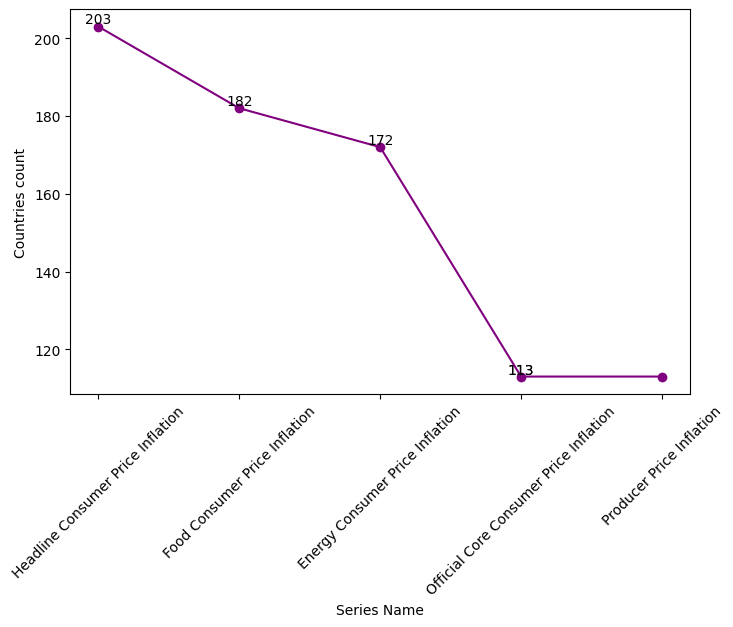

In [9]:
plt.figure(figsize=(8,5))
plt.plot(series['index'],series['Series Name'], marker = 'o', color = 'purple')
plt.xticks(ticks=series['index'], labels = series['index'], rotation = 45)

for value in series['Series Name']:
    index = series['Series Name'].tolist().index(value)
    plt.text(series['index'][index],value, str(value), ha='center', va='bottom') 

plt.xlabel('Series Name')
plt.ylabel('Countries count')
plt.show()

In [10]:
df.columns

Index(['Country Code', 'IMF Country Code', 'Country', 'Indicator Type',
       'Series Name', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', 'Note', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63'],
      dtype='object')

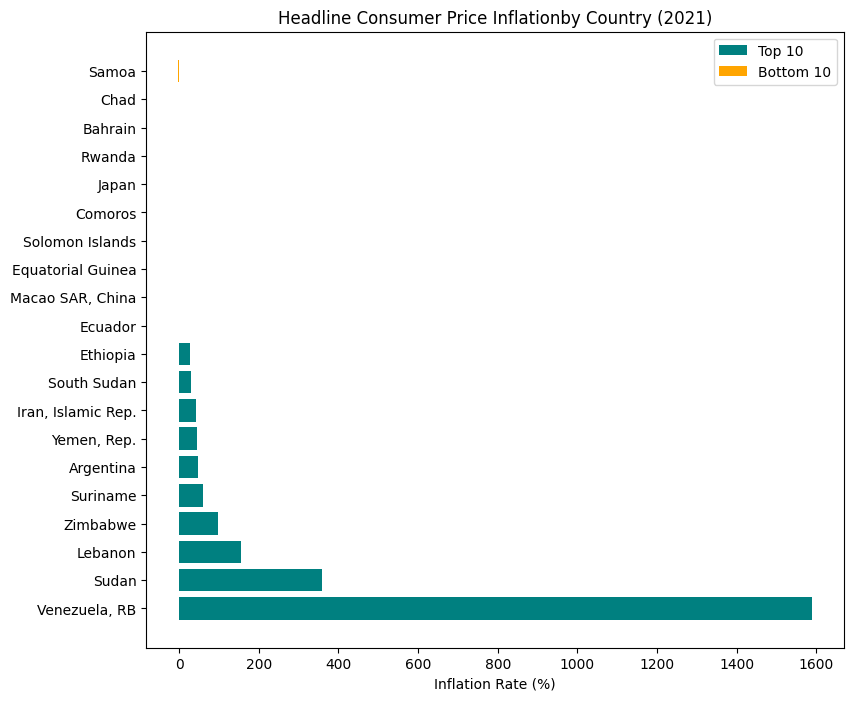

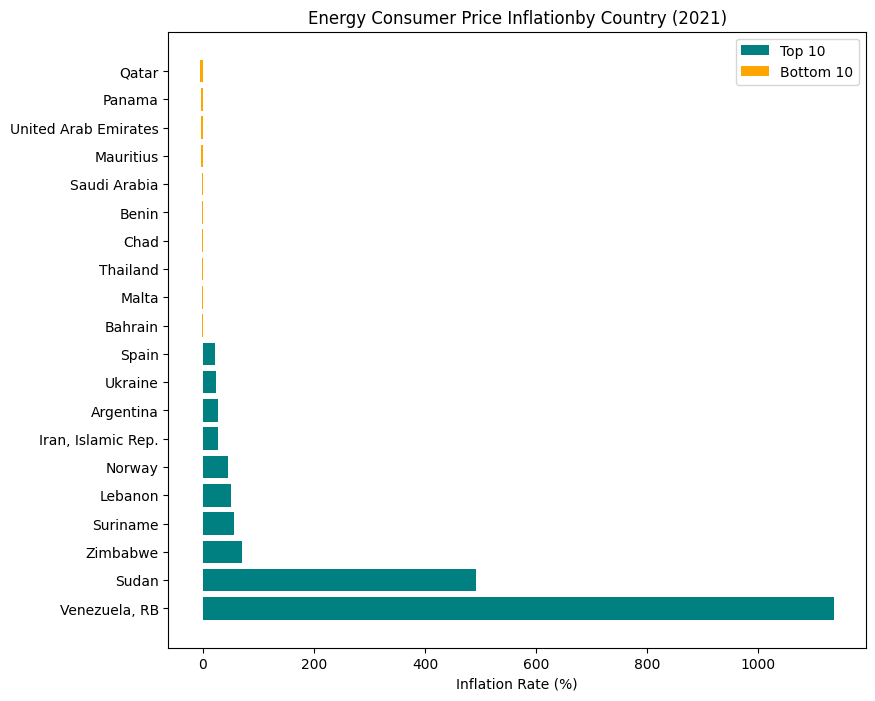

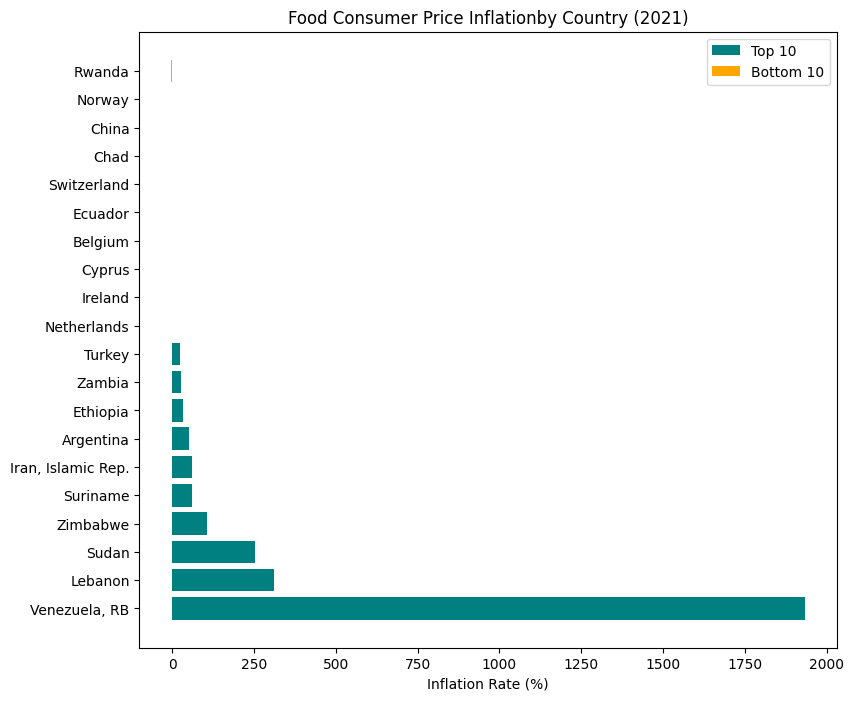

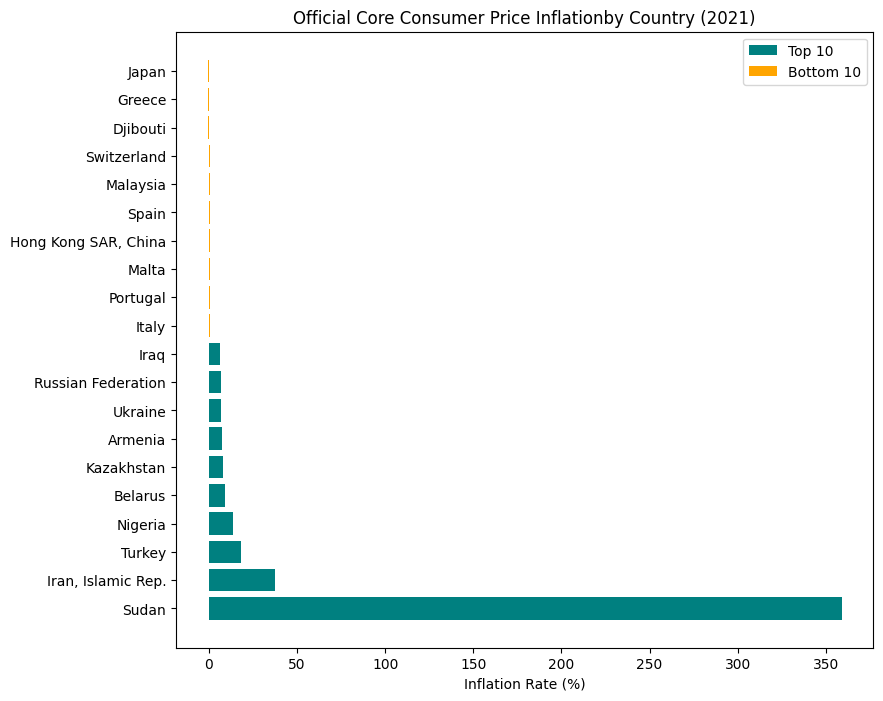

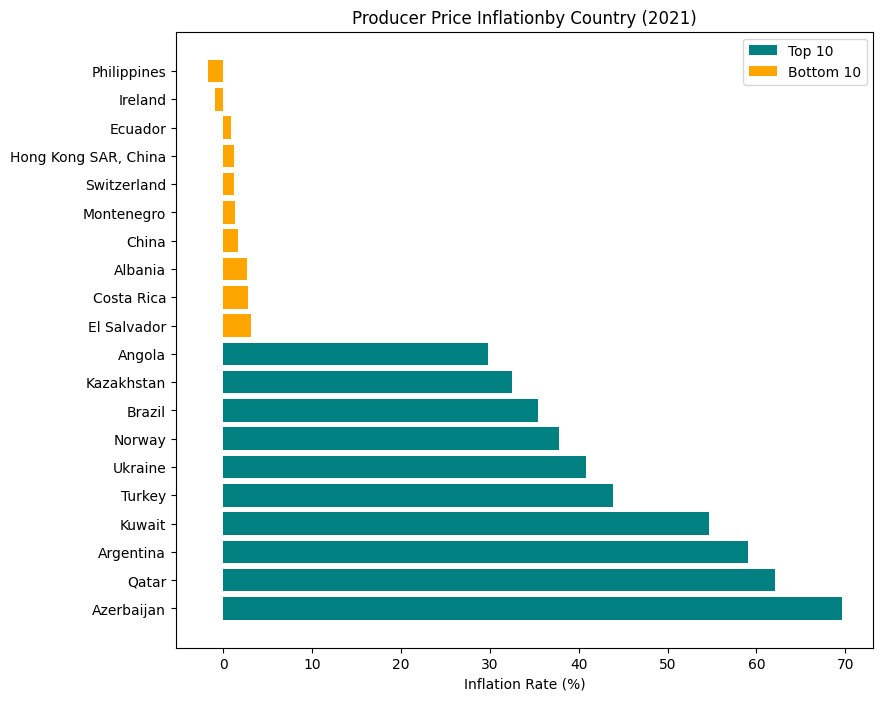

In [11]:
# filter the dataframe to only include 2021 inflation rate

series = ['Headline Consumer Price Inflation',
       'Energy Consumer Price Inflation', 'Food Consumer Price Inflation',
       'Official Core Consumer Price Inflation',
       'Producer Price Inflation']

for i in series:
  df_2021 = df[['Country', 'Series Name', '2021']]
  df_2021 = df_2021[df_2021['Series Name'] == i]

  # drop rows with missing or zero values

  df_2021 = df_2021.dropna()
  df_2021 = df_2021[df_2021['2021'] != 0]

  # sort the dataframe by inflation rate in descending order

  df_2021_sorted = df_2021.sort_values(by='2021', ascending=False)

  # create a figure and axis object
  fig, ax = plt.subplots(figsize=(9, 8))

  # plot the top 10 countries
  top_10 = df_2021_sorted.head(10)
  ax.barh(top_10['Country'], top_10['2021'], color='teal', label='Top 10')

  # plot the bottom 10 countries
  bottom_10 = df_2021_sorted.tail(10)
  ax.barh(bottom_10['Country'], bottom_10['2021'], color='orange', label='Bottom 10')

  # add labels and titles
  ax.set_xlabel('Inflation Rate (%)')
  ax.set_title(str(i)+'by Country (2021)')

  top_10_range = f'{top_10["2021"].min():.2f}% - {top_10["2021"].max():.2f}%'
  bottom_10_range = f'{bottom_10["2021"].min():.2f}% - {bottom_10["2021"].max():.2f}%'

  ax.legend()

# display the plot
plt.show()


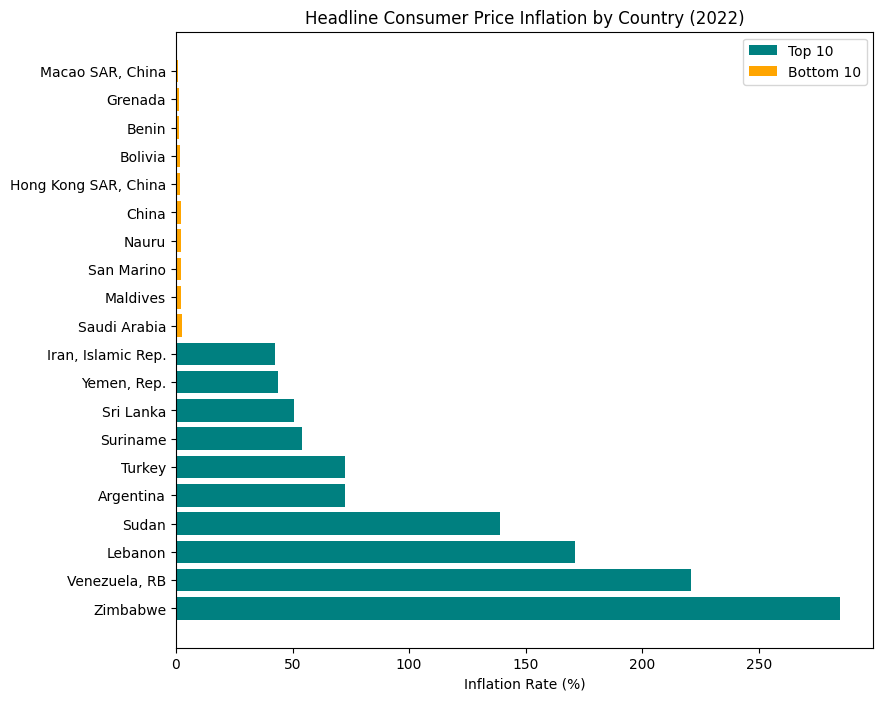

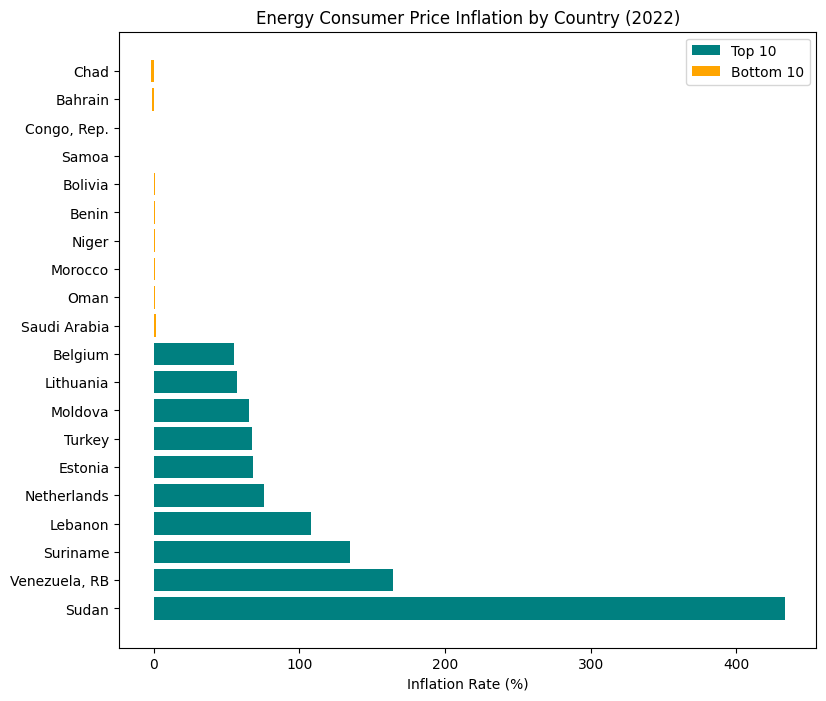

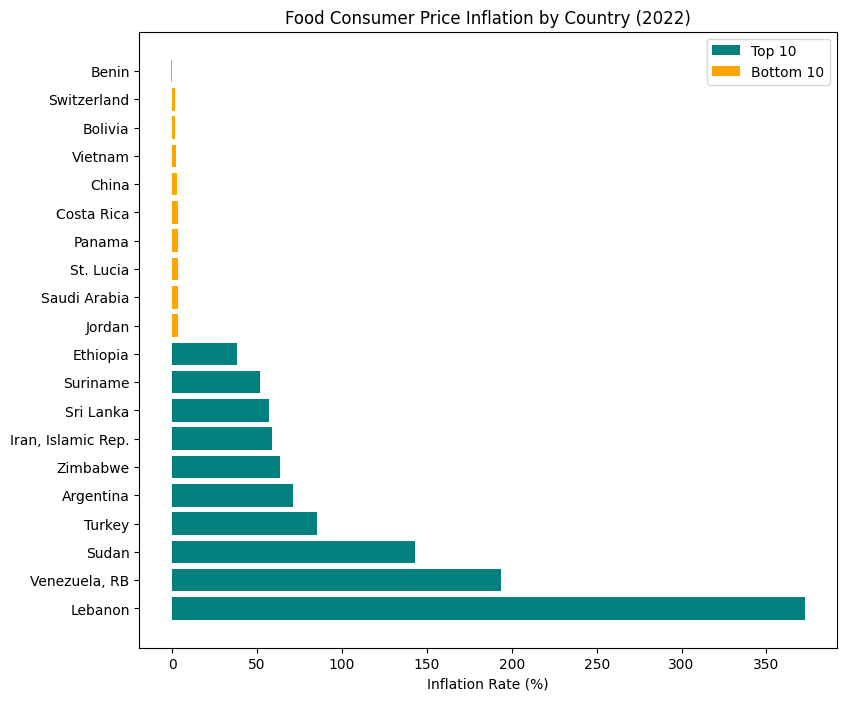

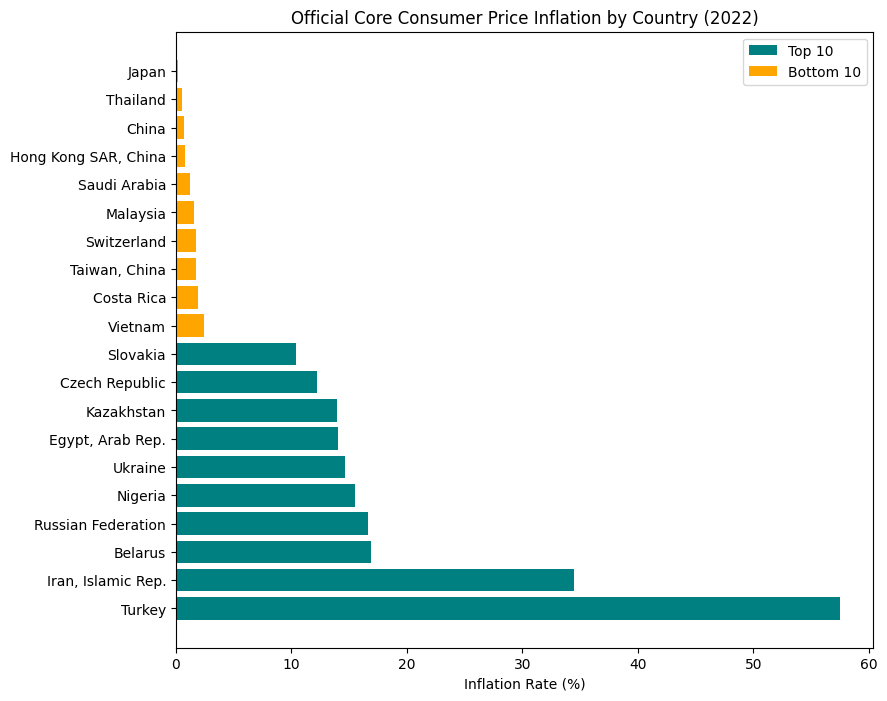

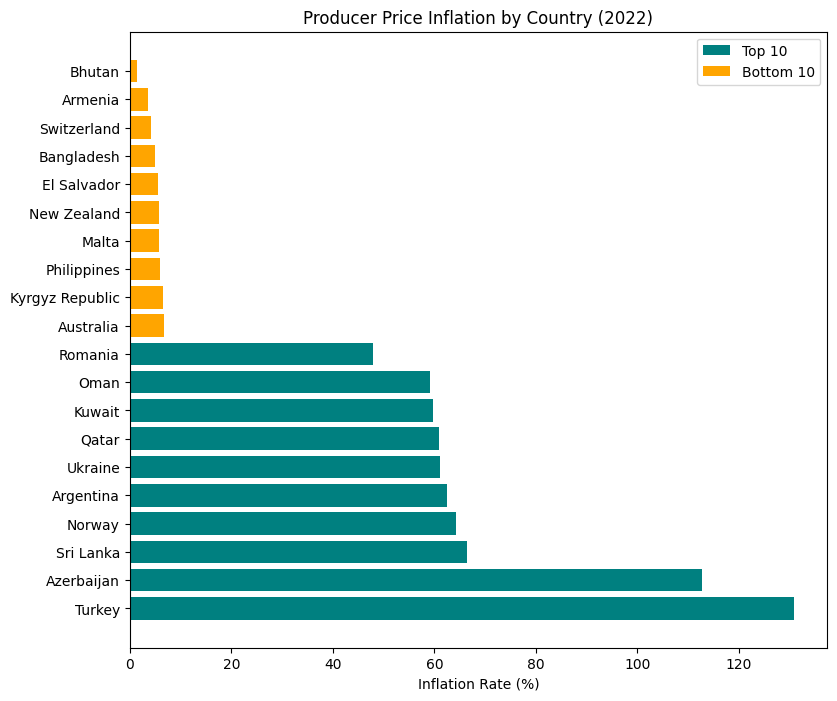

In [12]:
# filter the dataframe to only include 2022 inflation rate
for i in series:
  df_2022 = df[['Country', 'Series Name', '2022']]
  df_2022 = df_2022[df_2022['Series Name'] == i]

  # drop rows with missing or zero values

  df_2022 = df_2022.dropna()
  df_2022 = df_2022[df_2022['2022'] != 0]

  # sort the dataframe by inflation rate in descending order

  df_2022_sorted = df_2022.sort_values(by='2022', ascending=False)

  # create a figure and axis object
  fig, ax = plt.subplots(figsize=(9, 8))

  # plot the top 10 countries
  top_10 = df_2022_sorted.head(10)
  ax.barh(top_10['Country'], top_10['2022'], color='teal', label='Top 10')

  # plot the bottom 10 countries
  bottom_10 = df_2022_sorted.tail(10)
  ax.barh(bottom_10['Country'], bottom_10['2022'], color='orange', label='Bottom 10')

  # add labels and titles
  ax.set_xlabel('Inflation Rate (%)')
  ax.set_title(str(i)+' by Country (2022)')

  top_10_range = f'{top_10["2022"].min():.2f}% - {top_10["2022"].max():.2f}%'
  bottom_10_range = f'{bottom_10["2022"].min():.2f}% - {bottom_10["2022"].max():.2f}%'

  ax.legend()

# display the plot
plt.show()


<ipython-input-13-da29df3c2dad>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


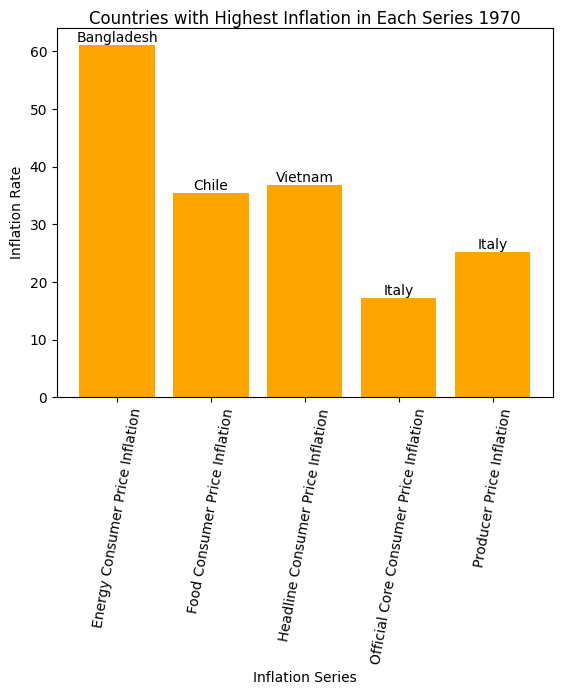

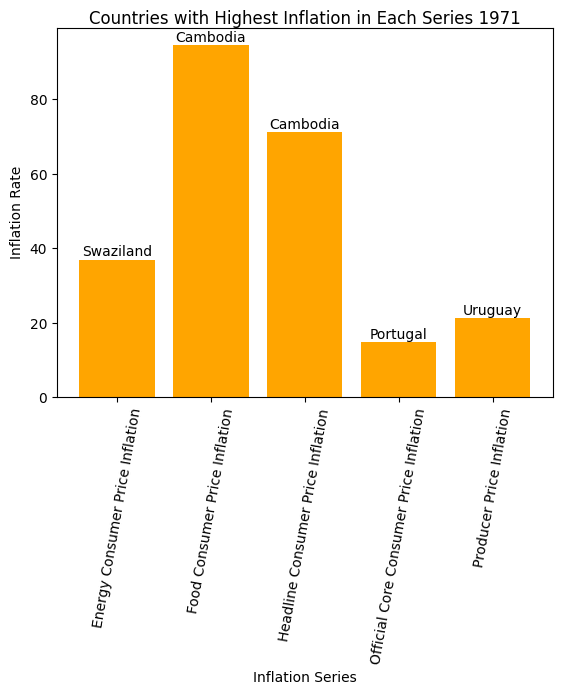

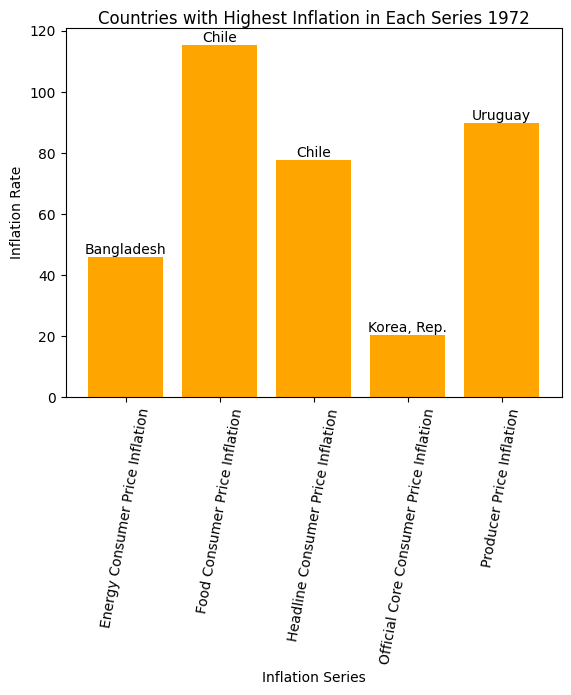

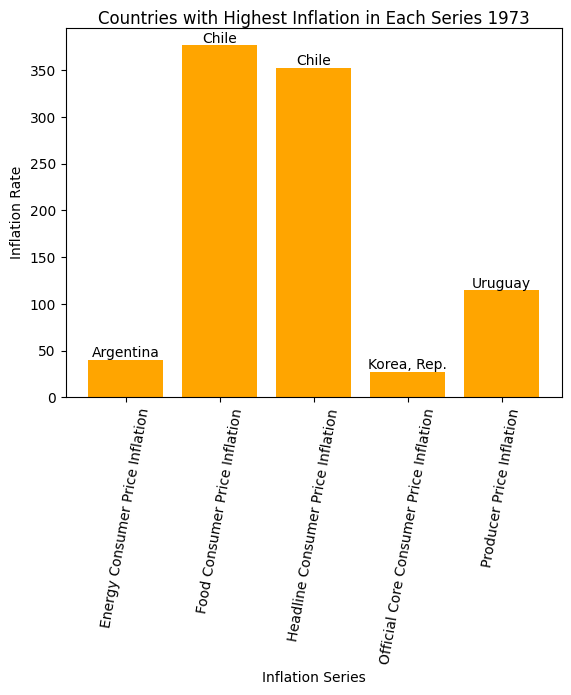

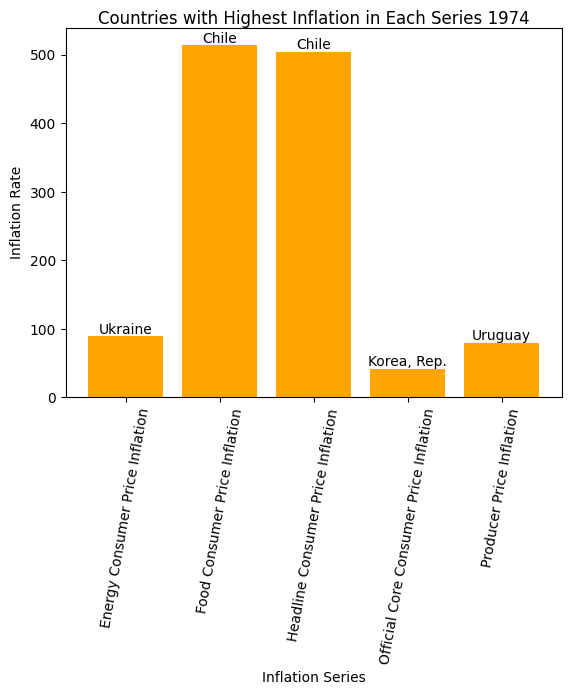

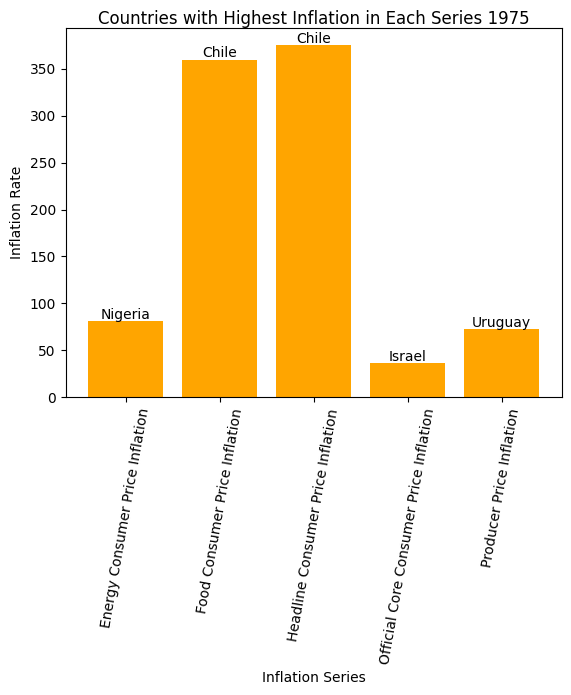

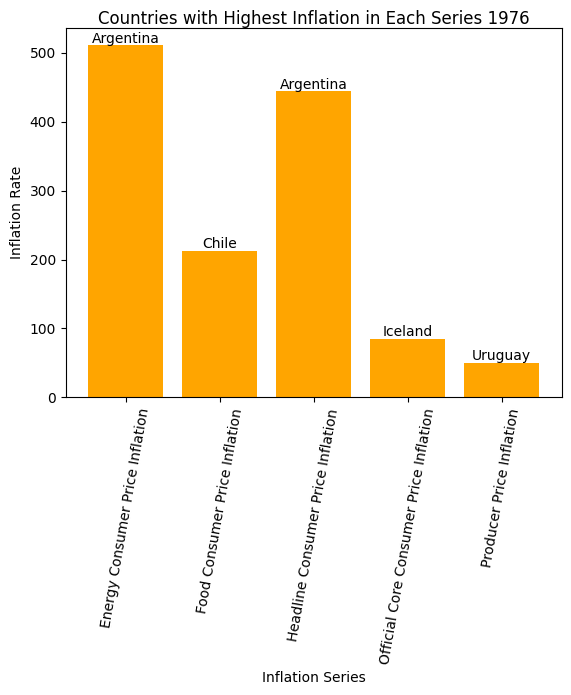

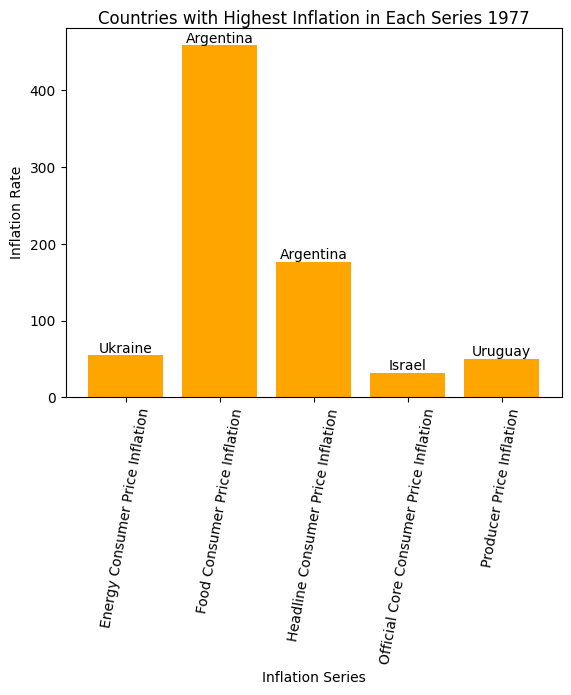

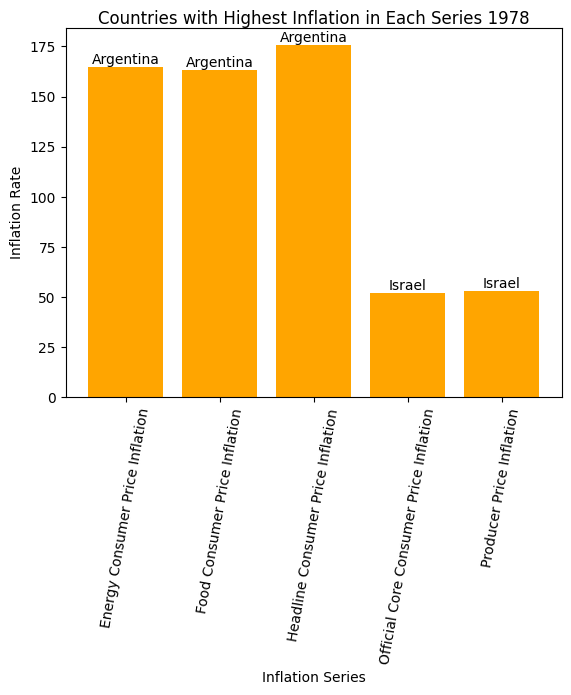

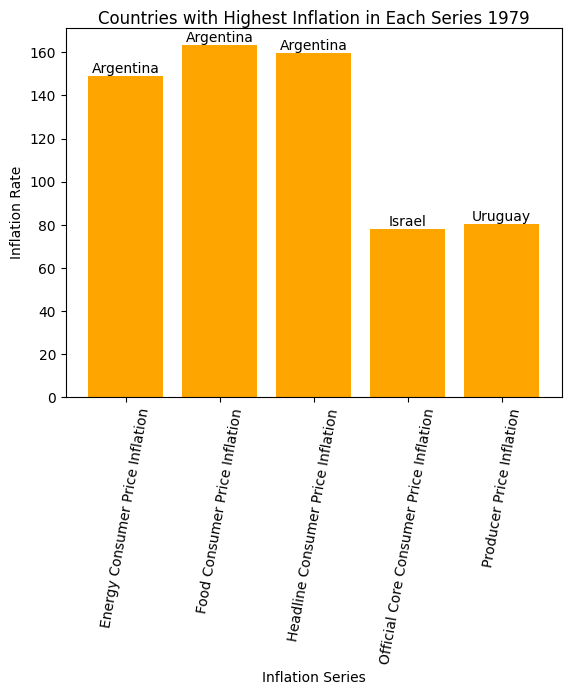

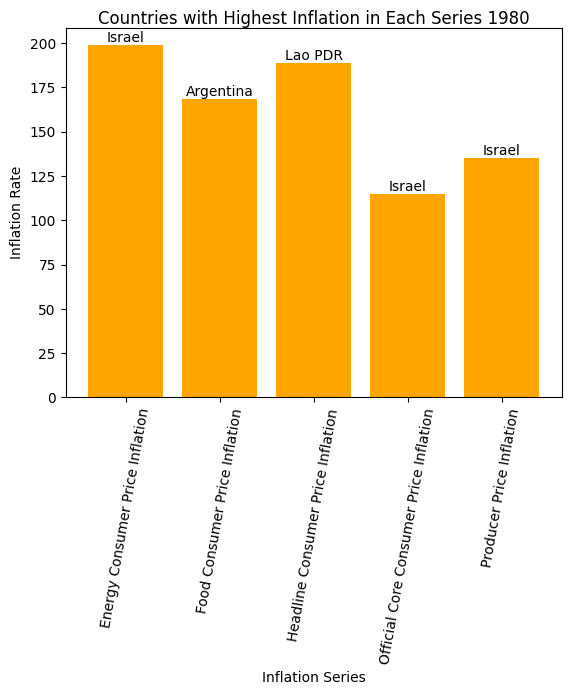

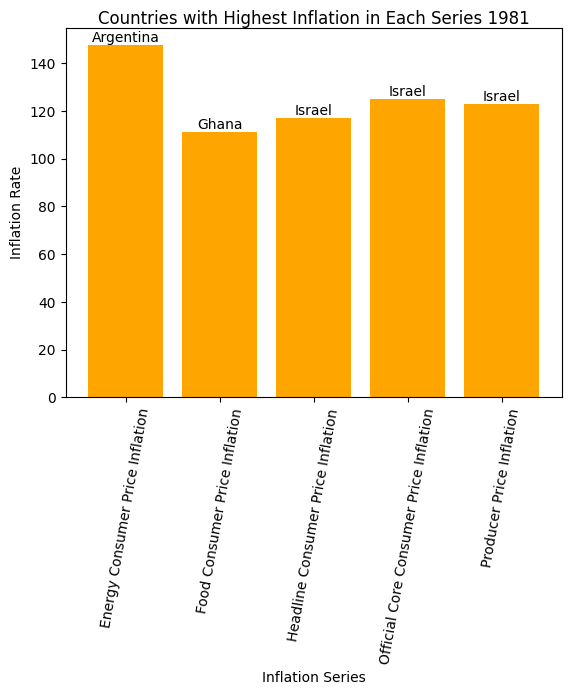

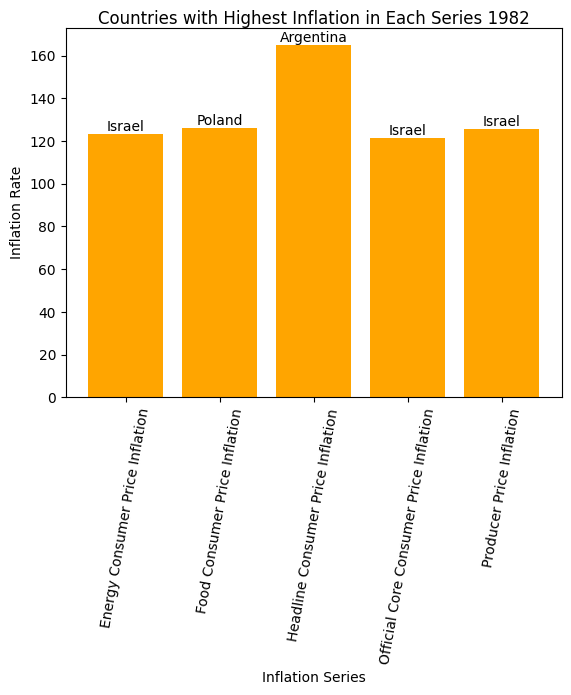

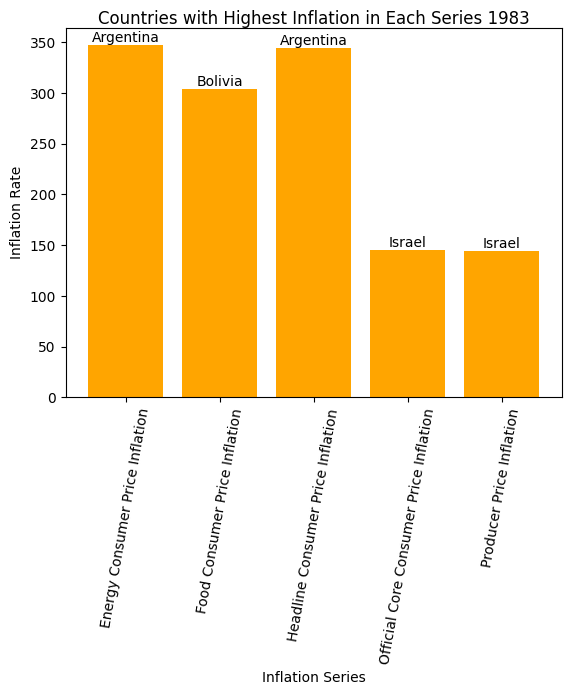

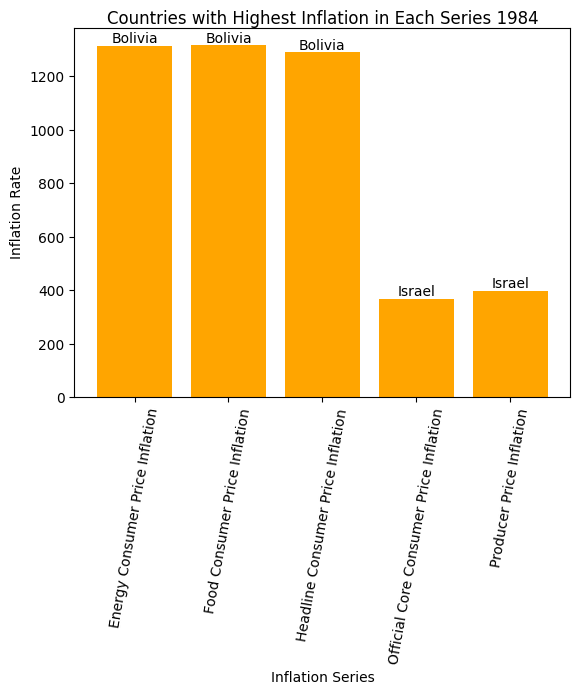

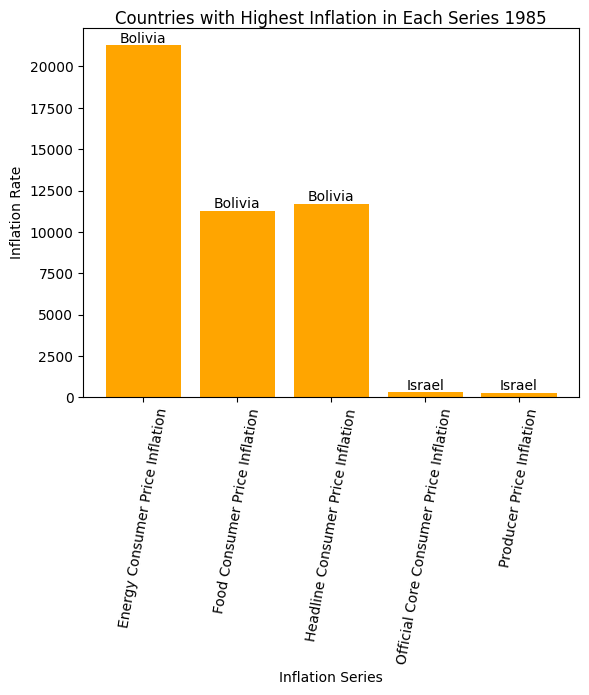

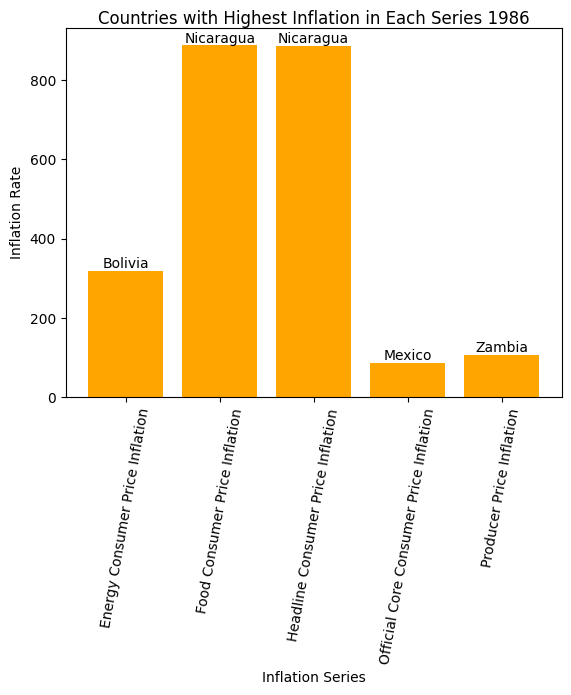

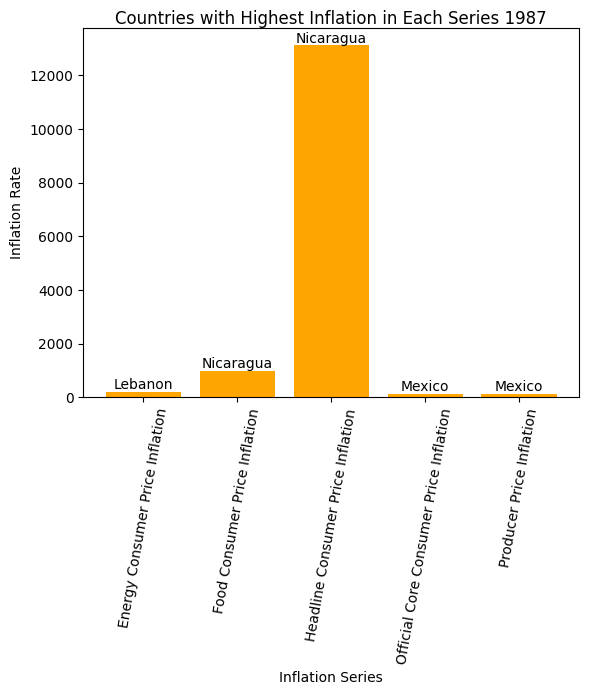

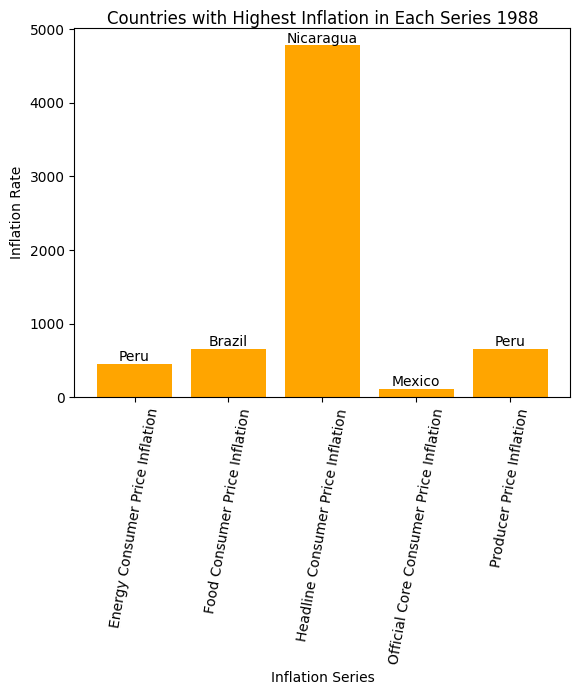

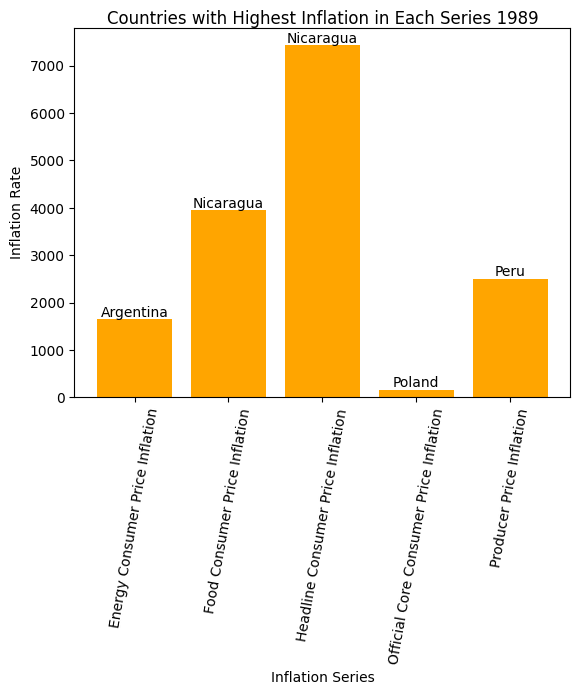

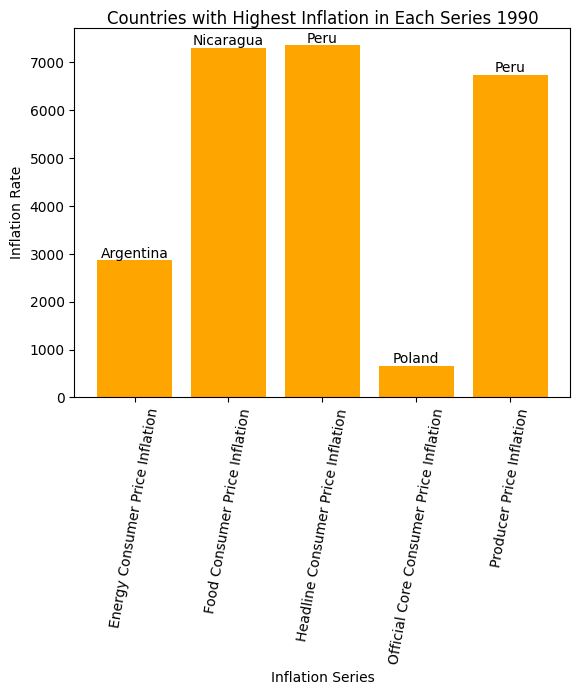

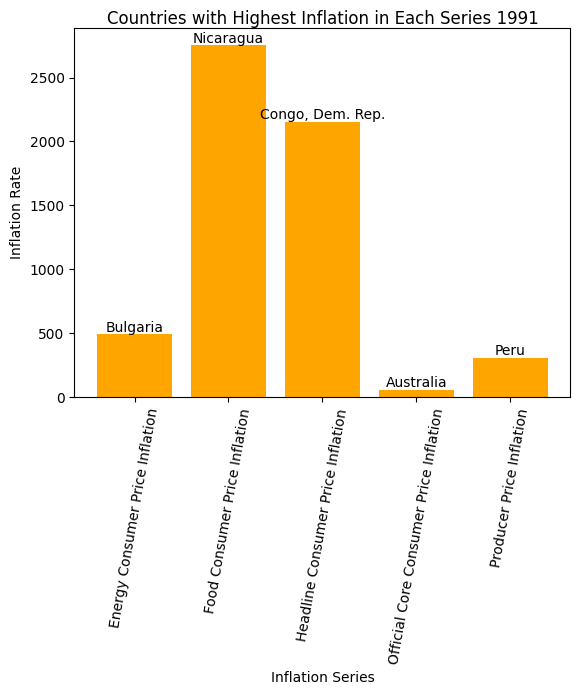

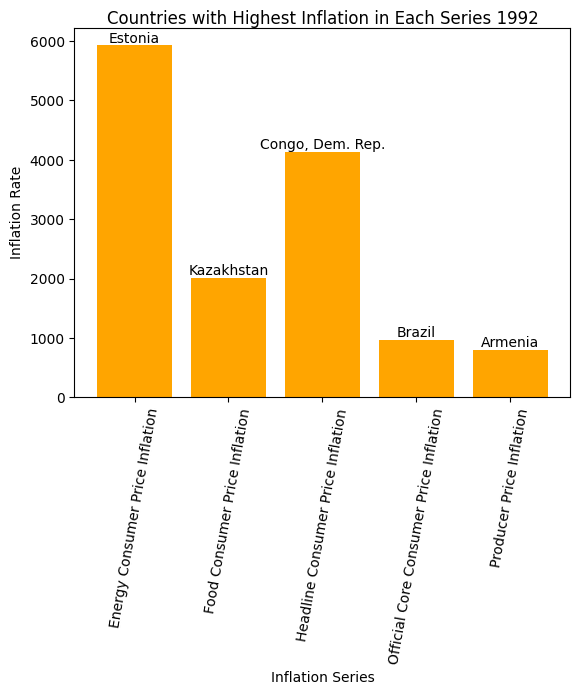

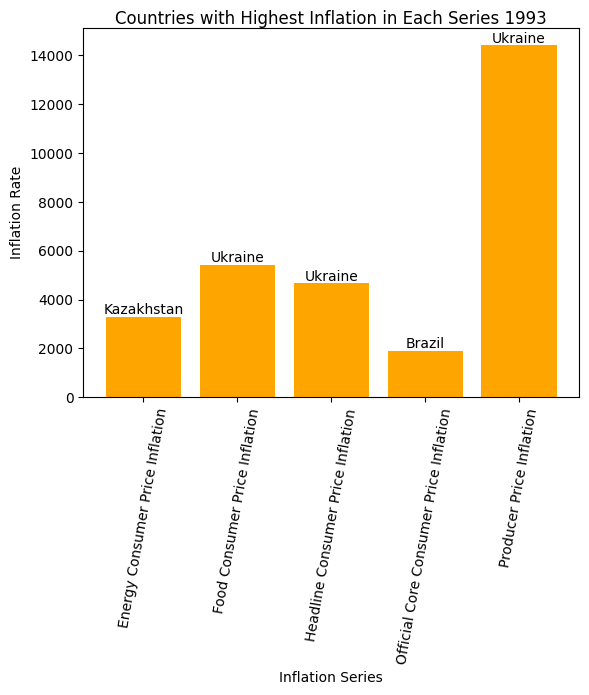

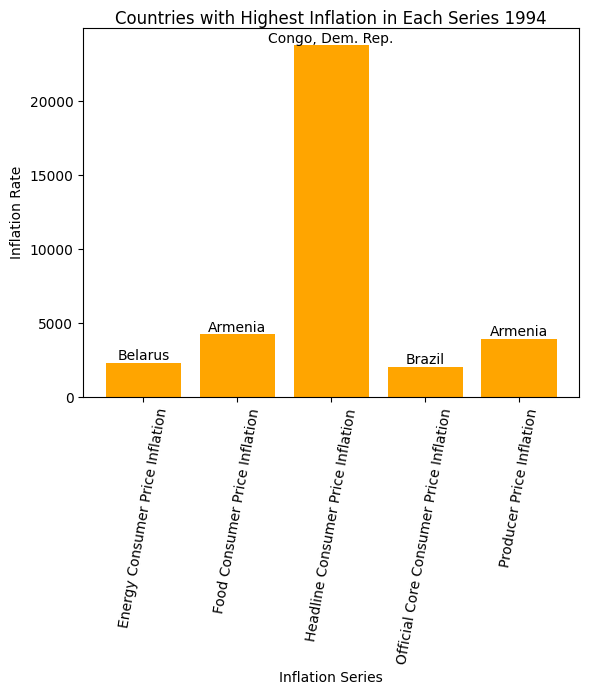

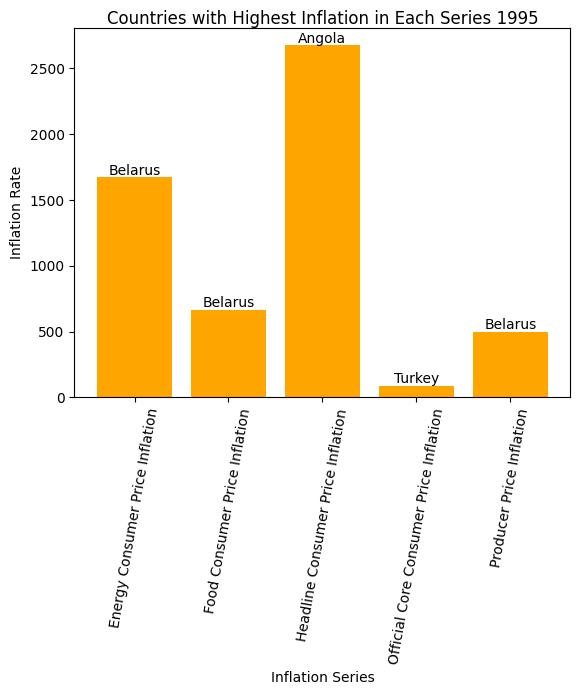

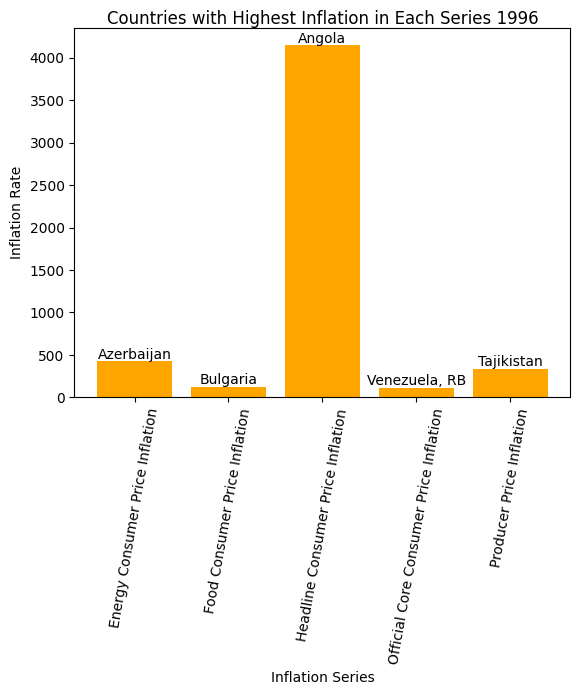

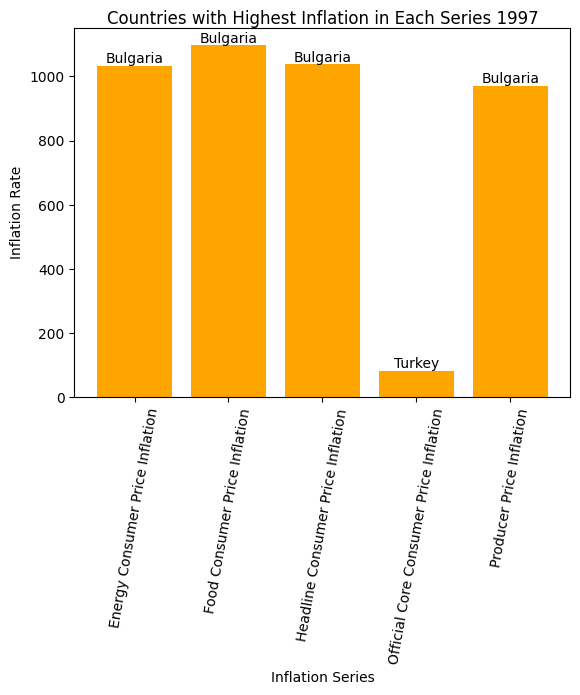

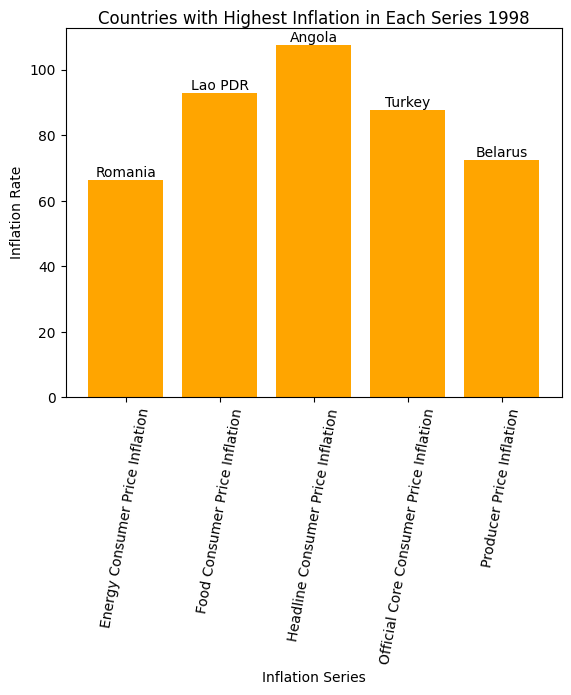

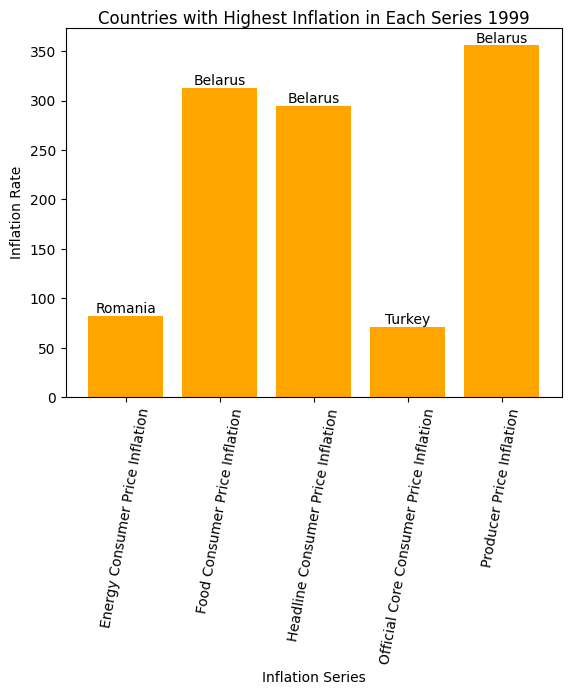

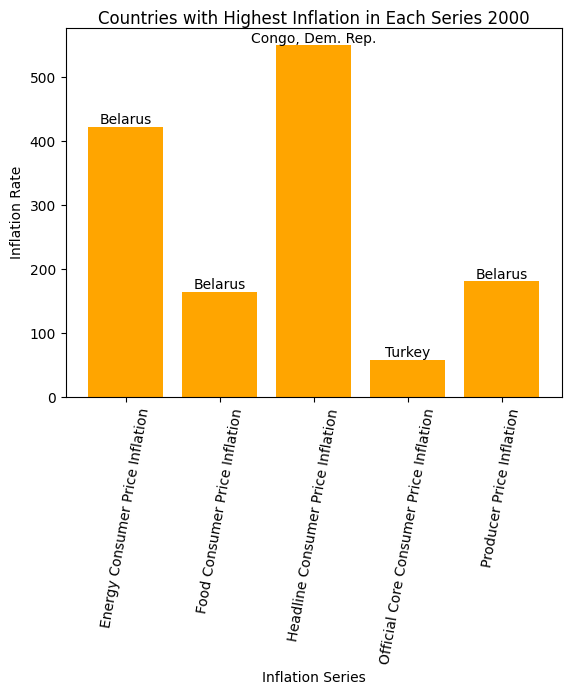

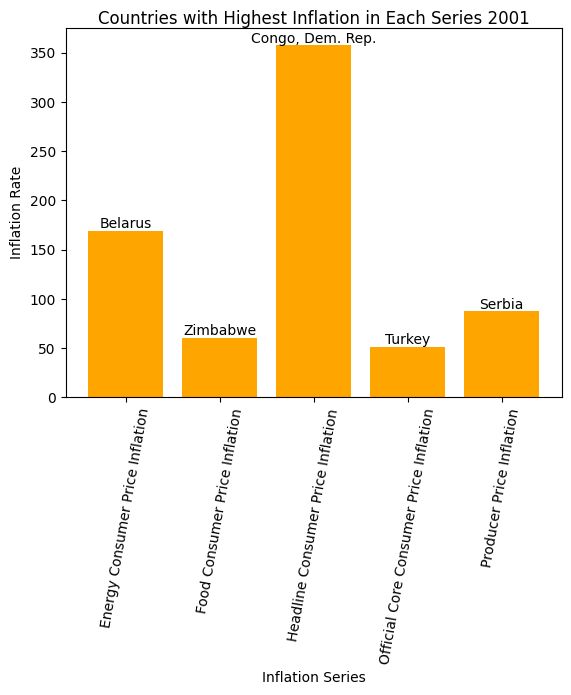

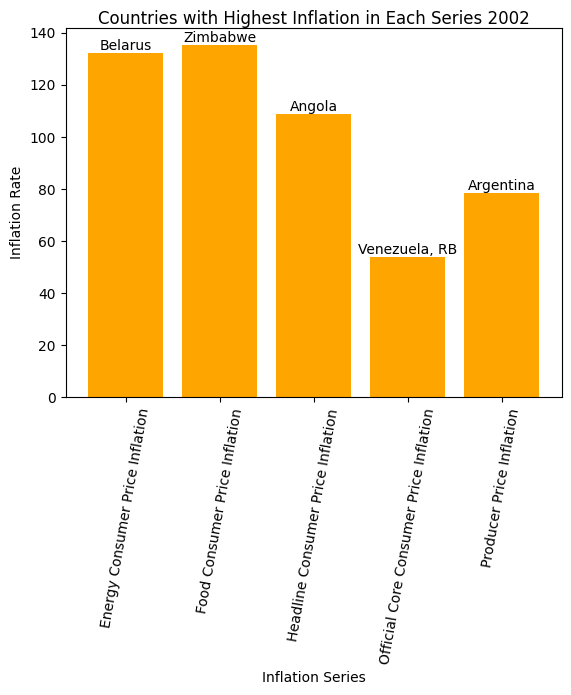

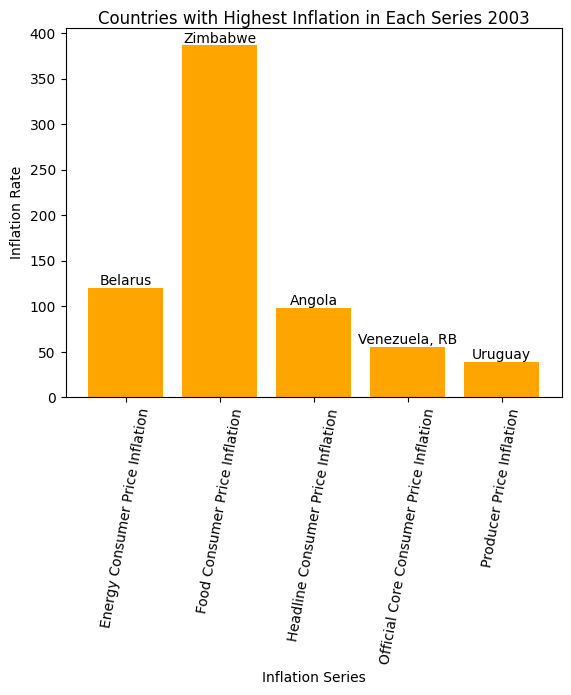

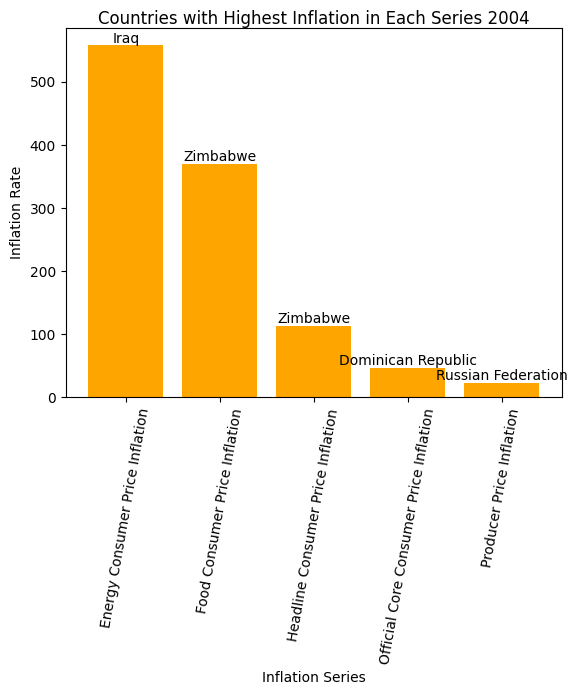

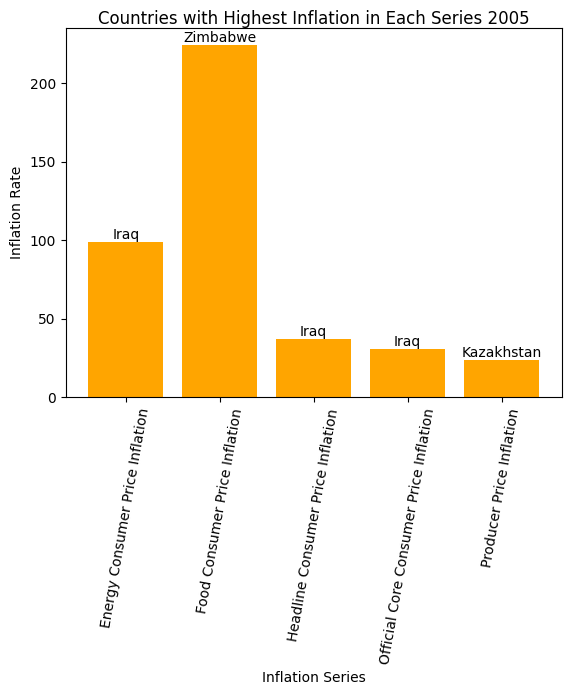

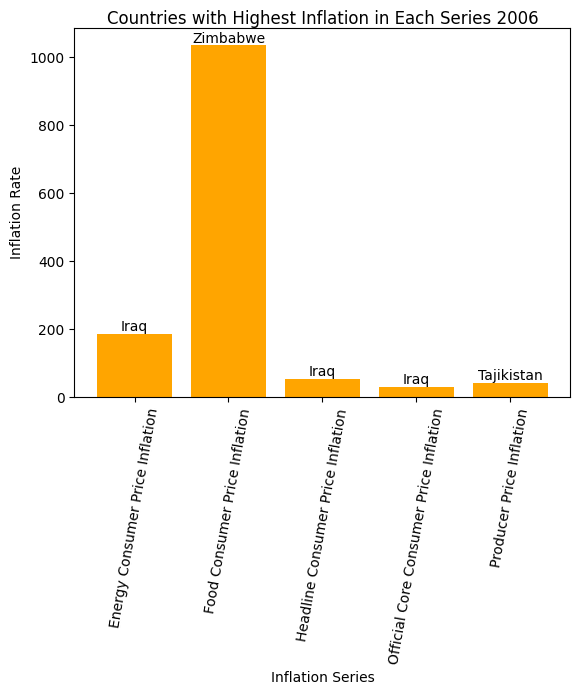

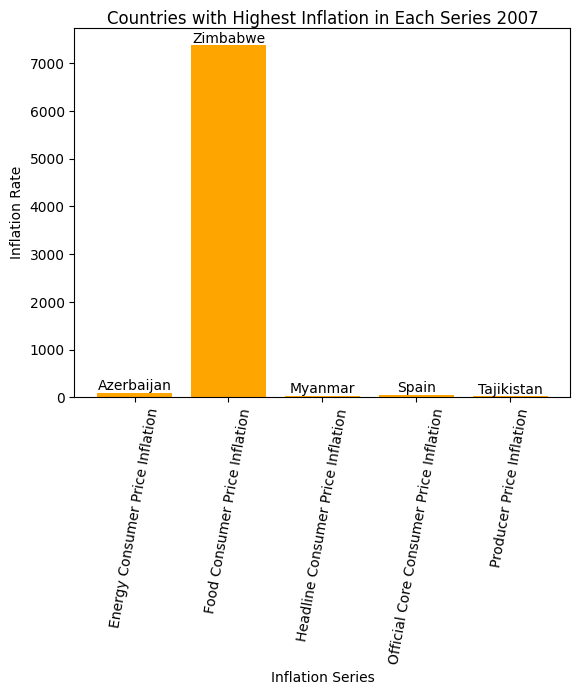

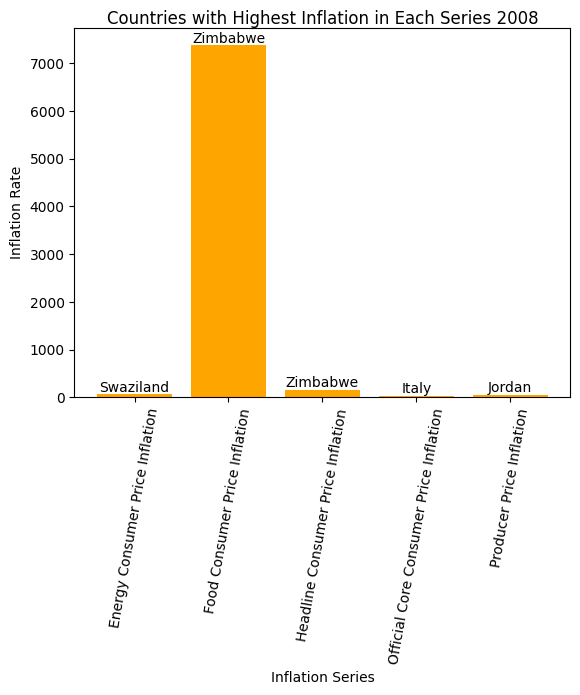

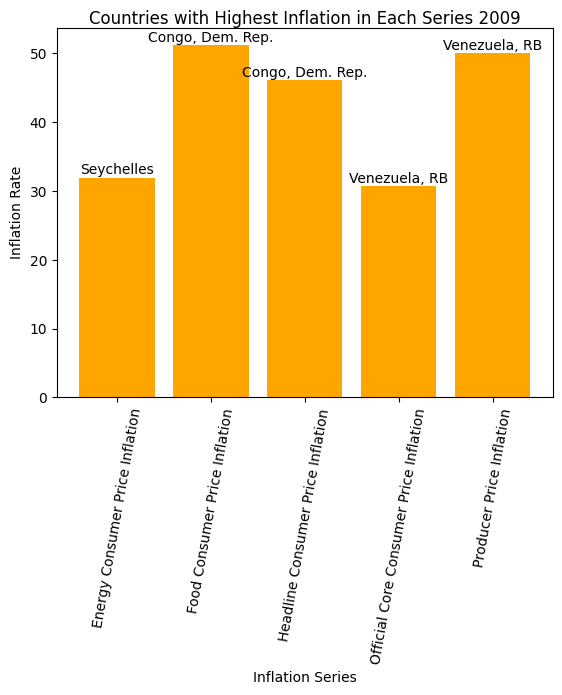

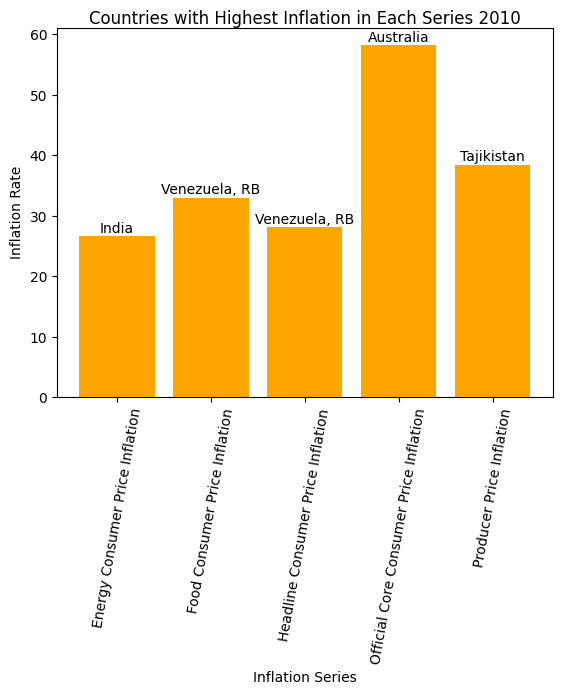

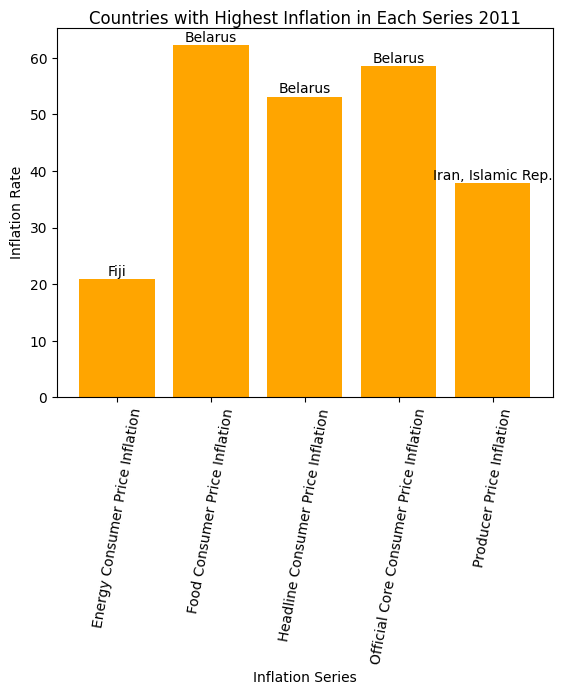

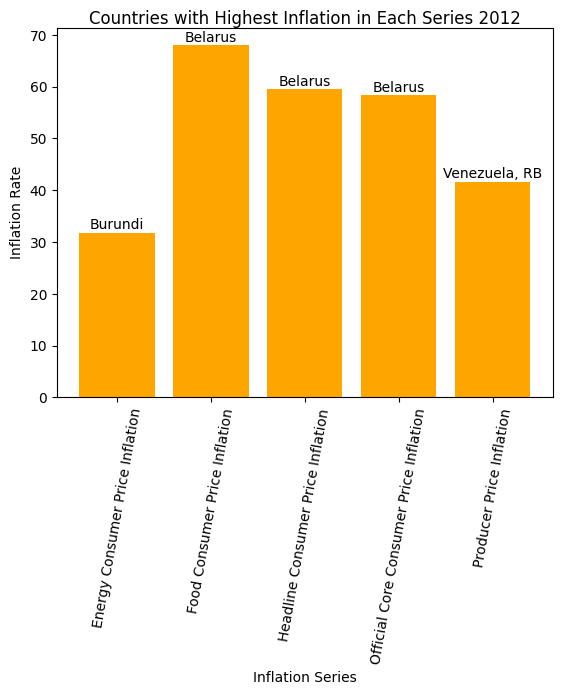

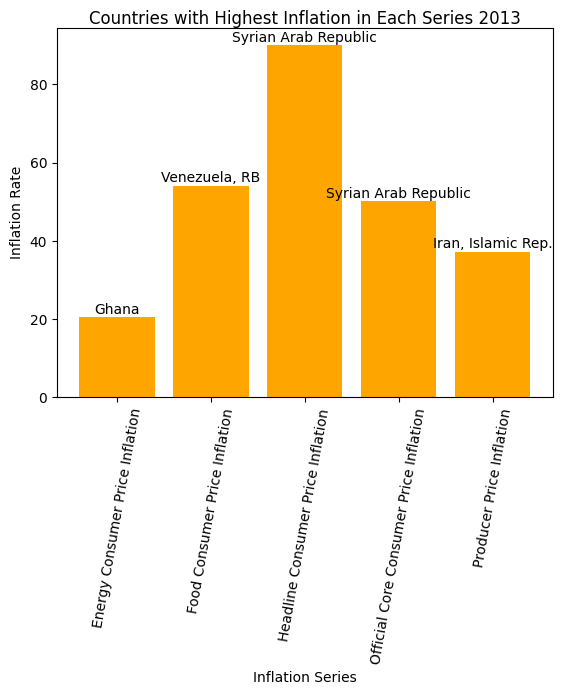

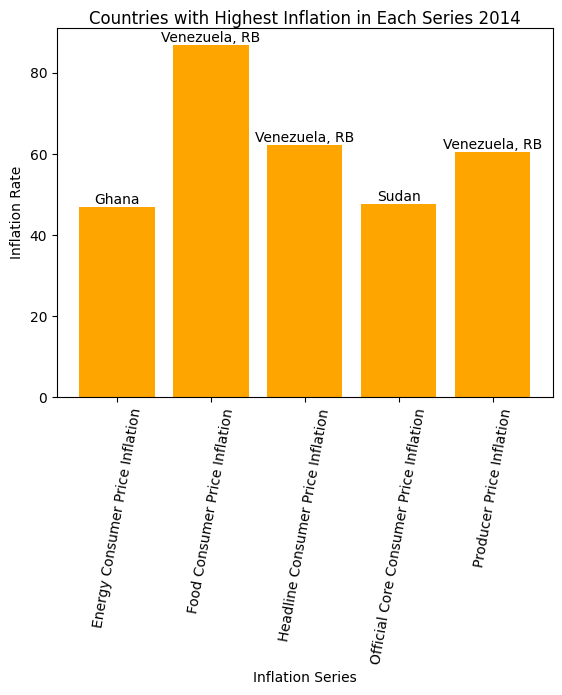

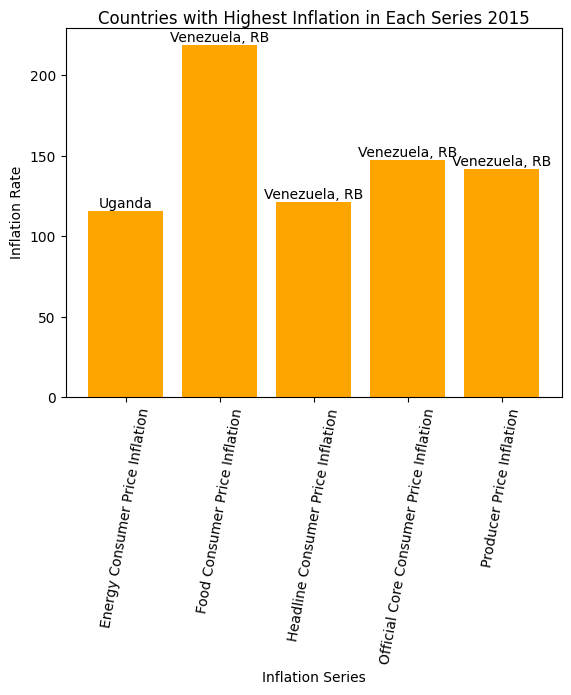

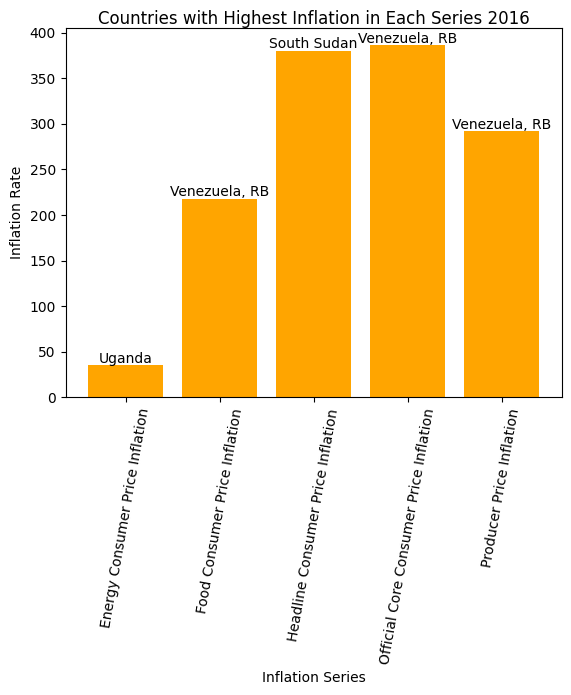

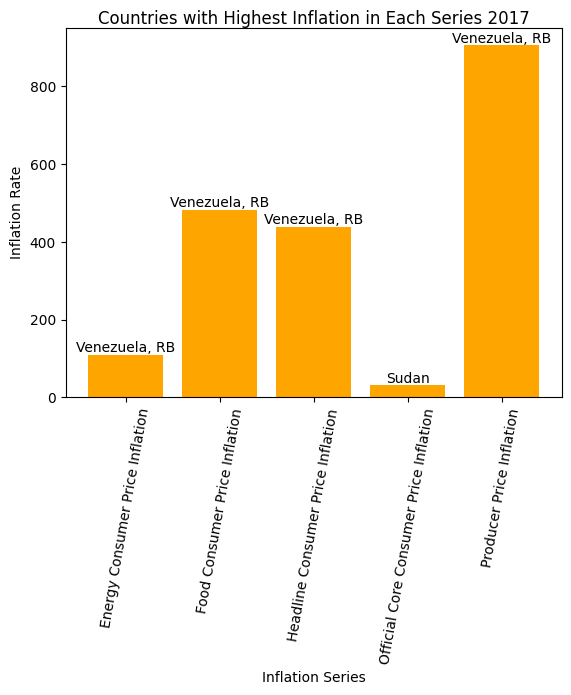

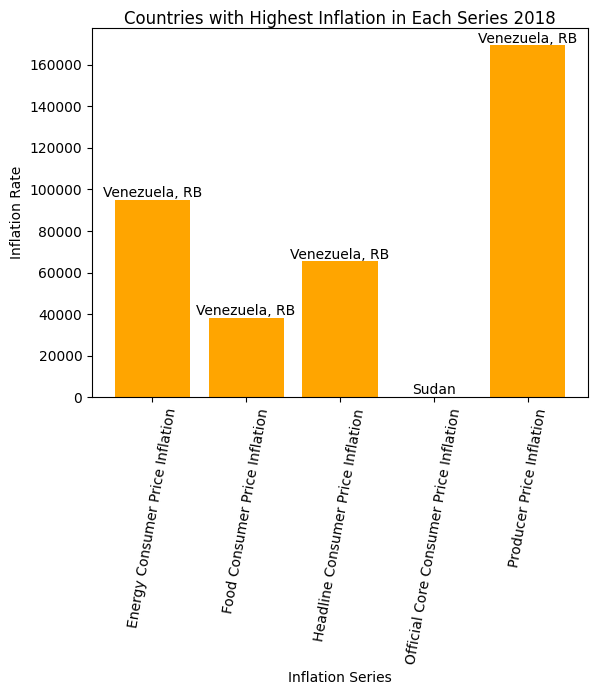

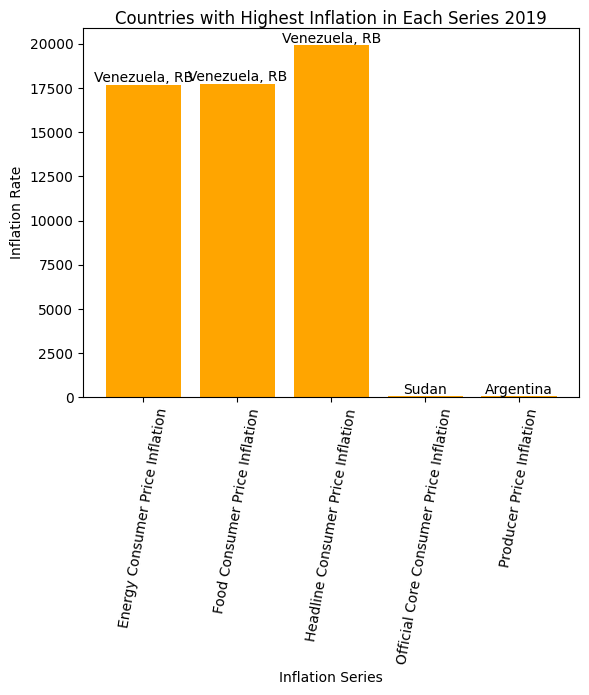

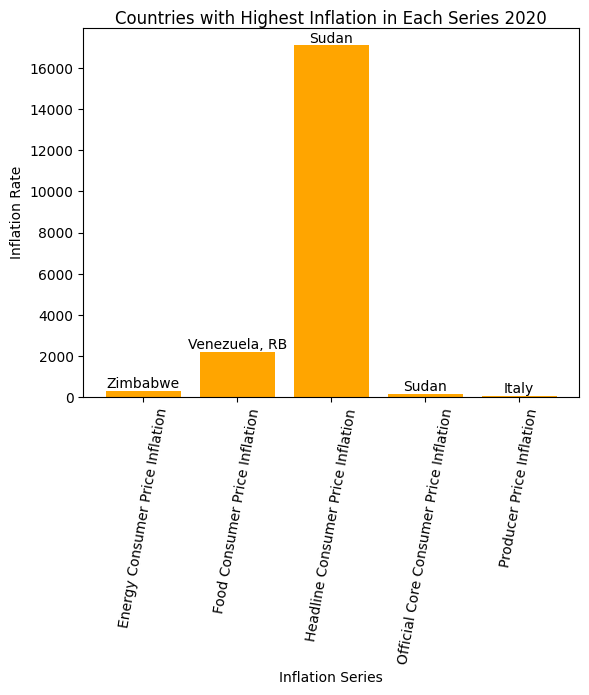

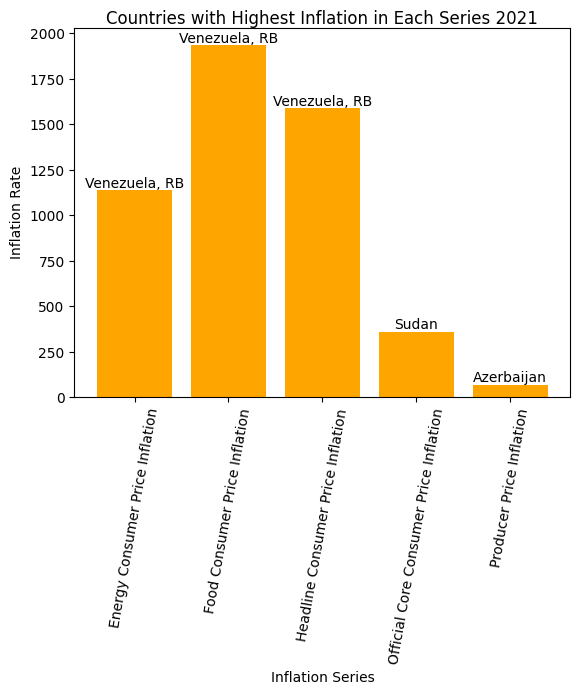

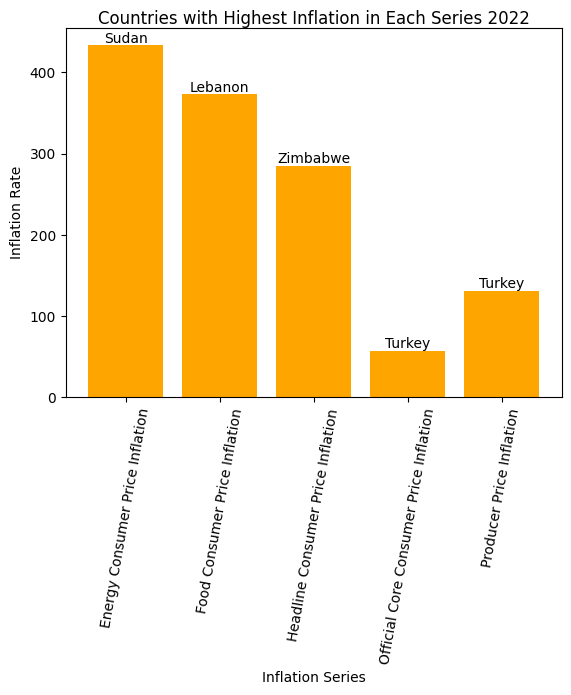

In [13]:
# finding the countries with highest inflation rate in each Series on 2022

year = ['1970','1971','1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021','2022']


for i in year:
    a = df[['Country', 'Series Name', i]]
    a = a.sort_values(by=i, ascending=False)
    b = a.pivot_table(index='Series Name', values=['Country', i], aggfunc=lambda x: x.iloc[0])

    fig, ax = plt.subplots()
    bars = ax.bar(b.index, b[i], color = 'orange')

    # Add labels to each bar
    for k, bar in enumerate(bars):
      ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, b['Country'][k], ha='center', va='bottom')

    # Set axis labels and title
    plt.xticks(rotation=80)
    plt.xlabel('Inflation Series')
    plt.ylabel('Inflation Rate')
    plt.title('Countries with Highest Inflation in Each Series ' +str(i), pad=1)

plt.show()

# Task 2.2:

**Preprocessing**

In [14]:
# finding the null values

df.isna().sum()

Country Code          0
IMF Country Code      2
Country               0
Indicator Type        0
Series Name           0
                   ... 
Unnamed: 59         764
Unnamed: 60         783
Unnamed: 61         783
Unnamed: 62         783
Unnamed: 63         783
Length: 64, dtype: int64

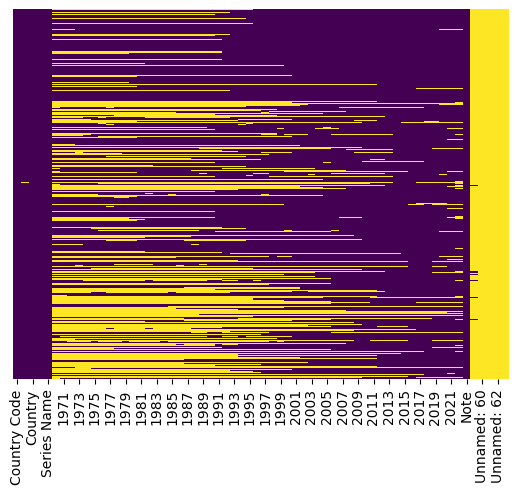

In [15]:

# display a heatmap of null values in the DataFrame

sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

plt.show()

In [16]:
# finding the countries with null IMF Country code

df[df['IMF Country Code'].isna()]

Country Code  IMF Country Code                 Country Indicator Type  \
366          VGB               NaN  British Virgin Islands      Inflation   
547          VGB               NaN  British Virgin Islands      Inflation   

                         Series Name  1970  1971  1972  1973  1974  ...  2019  \
366  Energy Consumer Price Inflation   NaN   NaN   NaN   NaN   NaN  ...   NaN   
547    Food Consumer Price Inflation   NaN   NaN   NaN   NaN   NaN  ...   NaN   

     2020  2021  2022                                           Note  \
366   NaN   NaN   NaN  Housing, Water, Electricity, Gas & Other Fuel   
547   NaN   NaN   NaN                 Food and non-acoholic beverage   

     Unnamed: 59  Unnamed: 60  Unnamed: 61  Unnamed: 62  Unnamed: 63  
366          NaN          NaN          NaN          NaN          NaN  
547          NaN          NaN          NaN          NaN          NaN  

[2 rows x 64 columns]

In [17]:
# checking if 'British Virgin Islands' has IMF Country code
df[df['Country']=='British Virgin Islands']

Country Code  IMF Country Code                 Country Indicator Type  \
193          VGB             284.0  British Virgin Islands      Inflation   
366          VGB               NaN  British Virgin Islands      Inflation   
373          VGB             284.0  British Virgin Islands      Inflation   
547          VGB               NaN  British Virgin Islands      Inflation   
555          VGB             284.0  British Virgin Islands      Inflation   

                           Series Name  1970  1971  1972  1973  1974  ...  \
193  Headline Consumer Price Inflation   NaN   NaN   NaN   NaN   NaN  ...   
366    Energy Consumer Price Inflation   NaN   NaN   NaN   NaN   NaN  ...   
373    Energy Consumer Price Inflation   NaN   NaN   NaN   NaN   NaN  ...   
547      Food Consumer Price Inflation   NaN   NaN   NaN   NaN   NaN  ...   
555      Food Consumer Price Inflation   NaN   NaN   NaN   NaN   NaN  ...   

     2019  2020  2021  2022                                           Note  \
193   1.4   0.4   2.8   NaN  Additional countries from the previous update   
366   NaN   NaN   NaN   NaN  Housing, Water, Electricity, Gas & Other Fuel   
373  -0.1  -1.0   0.9   NaN                           Housing & Utilities    
547   NaN   NaN   NaN   NaN                 Food and non-acoholic beverage   
555   0.8   1.0   3.2   NaN                 Food and non-acoholic beverage   

                                       Unnamed: 59  Unnamed: 60  Unnamed: 61  \
193                                            NaN          NaN          NaN   
366                                            NaN          NaN          NaN   
373  Additional countries from the previous update          NaN          NaN   
547                                            NaN          NaN          NaN   
555                           Additional countries          NaN          NaN   

     Unnamed: 62  Unnamed: 63  
193          NaN          NaN  
366          NaN          NaN  
373          NaN          NaN  
547          NaN          NaN  
555          NaN          NaN  

[5 rows x 64 columns]

In [18]:
# filling the IMF Country Code

df['IMF Country Code']=df['IMF Country Code'].fillna(284.0)

In [19]:
# filling the null values with 0 in Inflation rate from 1970 to 2022

df = df.fillna(0)

In [20]:
# Checking the unique values of other variables

print('Unnamed: 59: ',df['Unnamed: 59'].unique())
print('Unnamed: 60: ',df['Unnamed: 60'].unique())
print('Unnamed: 61: ',df['Unnamed: 61'].unique())
print('Unnamed: 62: ',df['Unnamed: 62'].unique())
print('Unnamed: 63: ',df['Unnamed: 63'].unique())
print('\nIndicator Type: ', df['Indicator Type'].unique())

Unnamed: 59:  [0 'Additional countries from the previous update' 'Additional countries']
Unnamed: 60:  [0.]
Unnamed: 61:  [0.]
Unnamed: 62:  [0.]
Unnamed: 63:  [0.]

Indicator Type:  ['Inflation']


In [21]:
# removing the variables that doesnot have dependancies to the target variable

df1 = df.drop(columns=['Unnamed: 59','Unnamed: 60','Unnamed: 61','Unnamed: 62','Unnamed: 63','Indicator Type'], axis=1)

In [22]:
# creating a dataframe for UK and US countries

uk = df1[df1['Country'] == "United Kingdom"]
us = df1[df1['Country']=='United States']

In [23]:
# printing the columns of UK dataframe

uk.columns

Index(['Country Code', 'IMF Country Code', 'Country', 'Series Name', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', 'Note'],
      dtype='object')

In [24]:
# removing less important variables

uk = uk.drop(columns=['Country Code', 'IMF Country Code', 'Country','Note'])
us = us.drop(columns=['Country Code', 'IMF Country Code', 'Country','Note'])

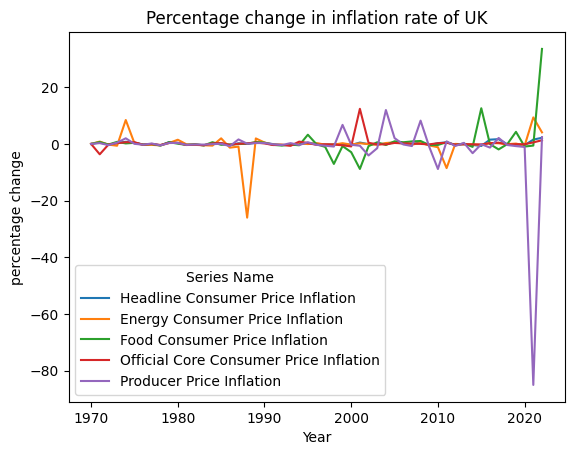

In [25]:
inflation = uk
inflation = inflation.set_index('Series Name')
# Calculate the percentage change in inflation rate for each country
inflation_pct_change = inflation.pct_change(axis=1)
inflation_pct_change= inflation_pct_change.fillna(0)

inflation_pct_change = inflation_pct_change.T

inflation_pct_change.plot()
plt.title("Percentage change in inflation rate of UK")
plt.ylabel("percentage change")
plt.xlabel("Year")
plt.show()


# Task 2.3:

**Statistics/ Computation based daa analytics**

In [26]:
# Select relevant columns
inflation = df1[['Country Code', 'Country', '1970','1971','1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021','2022']]

# Calculate average inflation rate for each country
inflation_mean = inflation.groupby('Country').mean()

# Print the result
print(inflation_mean.to_string())

<ipython-input-26-01ec96d719ba>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  inflation_mean = inflation.groupby('Country').mean()


                                     1970       1971       1972        1973        1974        1975        1976        1977        1978        1979        1980        1981        1982        1983         1984          1985        1986         1987        1988         1989         1990        1991         1992         1993         1994        1995         1996        1997       1998        1999        2000        2001       2002        2003        2004       2005        2006         2007         2008       2009       2010       2011       2012       2013       2014        2015        2016        2017          2018          2019         2020        2021        2022
Country                                                                                                                                                                                                                                                                                                                                 

In [27]:
print(df1.describe().to_string())

       IMF Country Code        1970        1971        1972        1973        1974        1975        1976        1977        1978        1979        1980        1981        1982        1983         1984          1985        1986          1987         1988         1989         1990         1991         1992          1993          1994         1995         1996         1997        1998        1999        2000        2001        2002        2003        2004        2005         2006         2007         2008        2009        2010        2011        2012        2013        2014        2015        2016        2017           2018          2019          2020         2021        2022
count        783.000000  783.000000  783.000000  783.000000  783.000000  783.000000  783.000000  783.000000  783.000000  783.000000  783.000000  783.000000  783.000000  783.000000  783.000000   783.000000    783.000000  783.000000    783.000000   783.000000   783.000000   783.000000   783.000000   783.000000   

In [28]:
# transposing the dataframe

uk = uk.T
us=us.T

In [29]:
# printing the UK dataframe

uk

62   \
Series Name  Headline Consumer Price Inflation   
1970                                      6.37   
1971                                      9.44   
1972                                      7.07   
1973                                       9.2   
1974                                     16.04   
1975                                     24.21   
1976                                     16.56   
1977                                     15.84   
1978                                      8.26   
1979                                     13.42   
1980                                     17.97   
1981                                     11.88   
1982                                       8.6   
1983                                      4.61   
1984                                      4.96   
1985                                      6.07   
1986                                      3.43   
1987                                      4.15   
1988                                      4.21   
1989                                      5.81   
1990                                      8.04   
1991                                      7.44   
1992                                      4.56   
1993                                      2.58   
1994                                       2.2   
1995                                      2.62   
1996                                      2.85   
1997                                      2.19   
1998                                      1.86   
1999                                      1.82   
2000                                       1.1   
2001                                      1.63   
2002                                      1.47   
2003                                      1.32   
2004                                      1.43   
2005                                      2.06   
2006                                      2.52   
2007                                      2.33   
2008                                      3.48   
2009                                      1.97   
2010                                       2.5   
2011                                      3.88   
2012                                      2.56   
2013                                      2.29   
2014                                      1.43   
2015                                       0.4   
2016                                       1.0   
2017                                      2.68   
2018                                      2.32   
2019                                      1.79   
2020                                      0.99   
2021                                       2.5   
2022                                       7.9   

                                         260                            434  \
Series Name  Energy Consumer Price Inflation  Food Consumer Price Inflation   
1970                                     5.7                            6.9   
1971                                    10.4                          11.47   
1972                                     7.8                           8.92   
1973                                     2.8                          15.37   
1974                                    26.4                          18.02   
1975                                    33.2                          24.97   
1976                                    23.7                          19.85   
1977                                    15.8                          18.79   
1978                                     7.7                           7.81   
1979                                    10.1                          12.62   
1980                                    25.0                          13.56   
1981                                    21.3                           8.69   
1982                                    14.0                           7.76   
1983                                     7.4                           3.67   
1984                        

In [30]:
# chaning the column names to the first row of the dataframes

uk.columns = uk.iloc[0]
uk = uk[1:]

us.columns = us.iloc[0]
us = us[1:]

In [31]:
# printing the shape of the dataframe

uk.shape

(53, 5)

In [32]:
uk.columns

Index(['Headline Consumer Price Inflation', 'Energy Consumer Price Inflation',
       'Food Consumer Price Inflation',
       'Official Core Consumer Price Inflation', 'Producer Price Inflation'],
      dtype='object', name='Series Name')

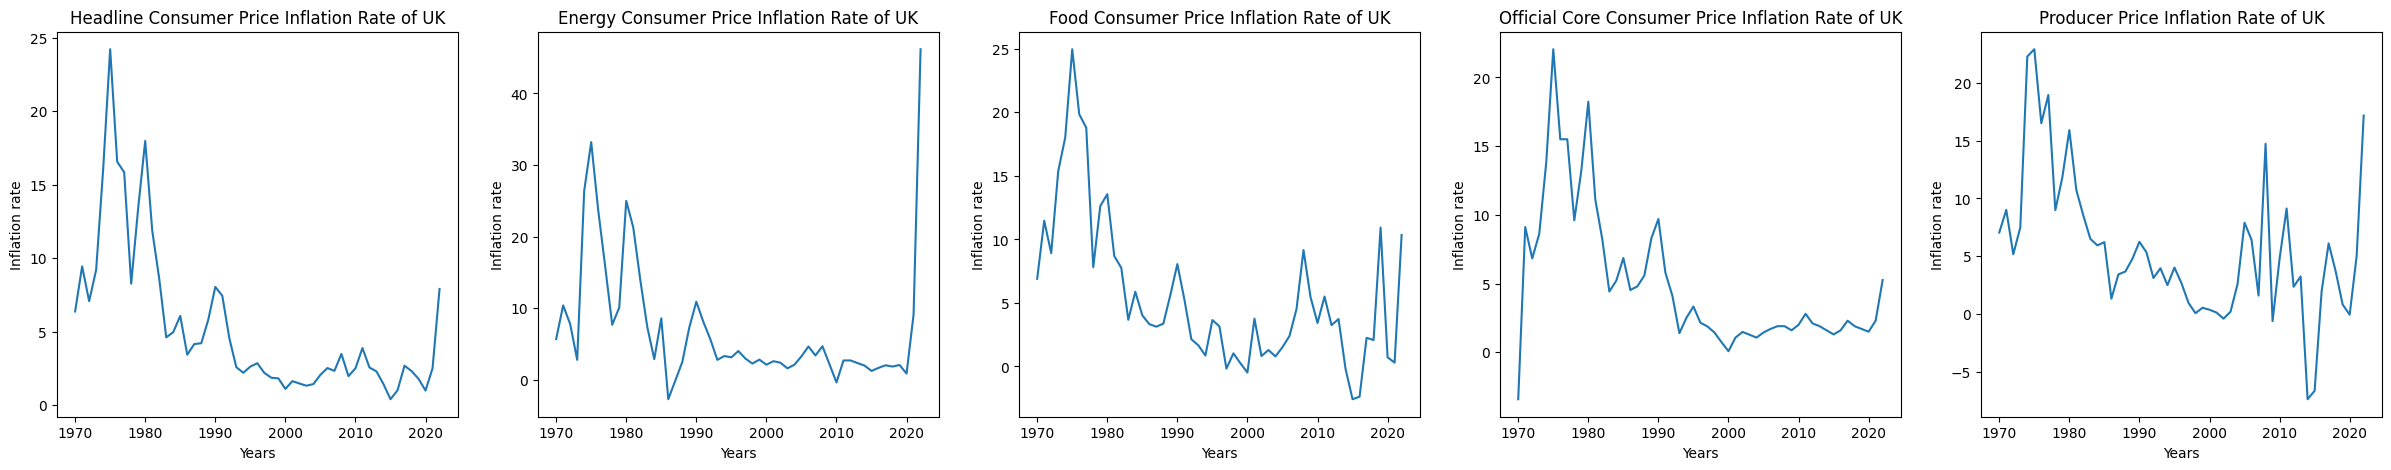

In [33]:
# printing the producer price inflation of UK
j=0
plt.figure(figsize=(30,5))
for i in series:
  j=j+1
  plt.subplot(1,5,j)
  uk[i].plot()
  plt.title(str(i)+" Rate of UK")
  plt.xlabel("Years")
  plt.ylabel("Inflation rate")
plt.show()

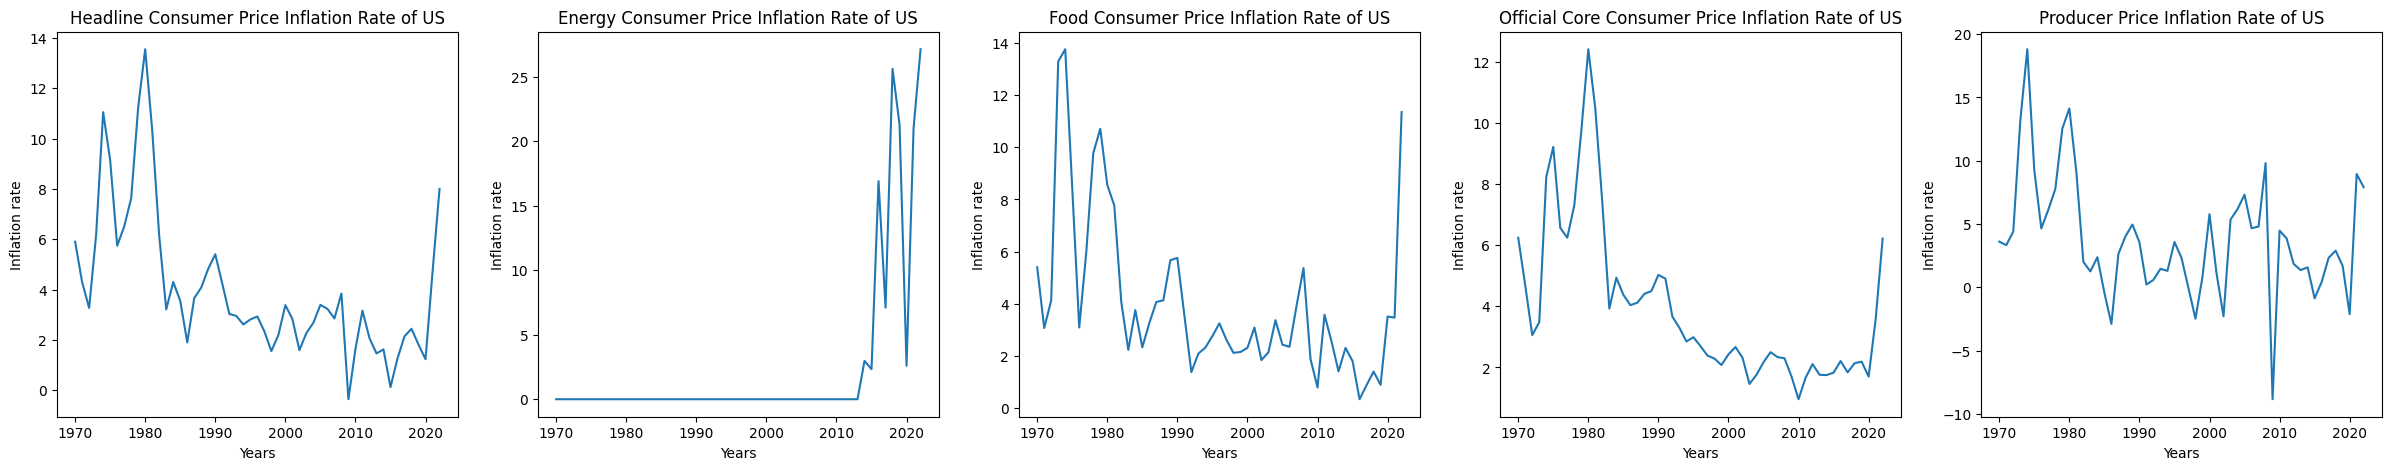

In [34]:
# printing the producer price inflation of US

j=0
plt.figure(figsize=(30,5))
for i in series:
  j=j+1
  plt.subplot(1,5,j)
  us[i].plot()
  plt.title(str(i)+" Rate of US")
  plt.xlabel("Years")
  plt.ylabel("Inflation rate")
plt.show()

Using ARIMA model for prediction of Headline Consumer price inflation rate of UK



In [35]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.7 MB/s eta 0:00:00


In [36]:
# importing necessary files for modelling

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import pmdarima as pm
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

Using ADF (Augmented Dickey-Fuller) test the stationarity of the dataset for the time series analysis.

In [37]:

result = adfuller(uk['Producer Price Inflation'])

# print the test statistic, p-value, and critical values
print("ADF Statistic: {:.3f}".format(result[0]))
print("p-value: {:.3f}".format(result[1]))
print("Critical Values:")
for key, value in result[4].items():
    print("\t{}: {:.3f}".format(key, value))

ADF Statistic: -3.045
p-value: 0.031
Critical Values:
	1%: -3.563
	5%: -2.919
	10%: -2.597


Using AutoARIMA to automatically select the best combination of parameters for the ARIMA model.

In [38]:
model = pm.auto_arima(uk['Producer Price Inflation'], trace=True, suppress_warnings=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=324.689, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=323.958, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=321.993, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=322.759, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=321.790, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=321.776, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=323.395, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=323.711, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=319.783, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=319.858, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=319.730, Time=0.14 se

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   53
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -156.865
Date:                Fri, 12 May 2023   AIC                            319.730
Time:                        08:00:41   BIC                            325.584
Sample:                    01-01-1970   HQIC                           321.974
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5092      0.220      2.317      0.021       0.078       0.940
ma.L1         -0.8769      0.220     -3.988      0.000      -1.308      -0.446
sigma2        24.1480      4.307      5.606      0.000      15.706      32.590
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                12.75
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                             0.81
Prob(H) (two-sided):                  0.32   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
# changing the index of the dataset to timestamp for modelling and visualization

periods = pd.period_range(start=uk.index[0], end=uk.index[-1], freq='A')
uk.index = periods
uk.index = uk.index.to_timestamp()


In [40]:
uk

Series Name Headline Consumer Price Inflation Energy Consumer Price Inflation  \
1970-01-01                               6.37                             5.7   
1971-01-01                               9.44                            10.4   
1972-01-01                               7.07                             7.8   
1973-01-01                                9.2                             2.8   
1974-01-01                              16.04                            26.4   
1975-01-01                              24.21                            33.2   
1976-01-01                              16.56                            23.7   
1977-01-01                              15.84                            15.8   
1978-01-01                               8.26                             7.7   
1979-01-01                              13.42                            10.1   
1980-01-01                              17.97                            25.0   
1981-01-01                              11.88                            21.3   
1982-01-01                                8.6                            14.0   
1983-01-01                               4.61                             7.4   
1984-01-01                               4.96                             2.9   
1985-01-01                               6.07                             8.6   
1986-01-01                               3.43                            -2.7   
1987-01-01                               4.15                            -0.1   
1988-01-01                               4.21                             2.5   
1989-01-01                               5.81                            7.33   
1990-01-01                               8.04                           10.92   
1991-01-01                               7.44                            8.11   
1992-01-01                               4.56                            5.68   
1993-01-01                               2.58                             2.8   
1994-01-01                                2.2                            3.33   
1995-01-01                               2.62                            3.15   
1996-01-01                               2.85                            4.03   
1997-01-01                               2.19                            2.98   
1998-01-01                               1.86                            2.28   
1999-01-01                               1.82                            2.83   
2000-01-01                                1.1                            2.12   
2001-01-01                               1.63                            2.61   
2002-01-01                               1.47                             2.4   
2003-01-01                               1.32                            1.61   
2004-01-01                               1.43                            2.12   
2005-01-01                               2.06                            3.29   
2006-01-01                               2.52                            4.67   
2007-01-01                               2.33                            3.41   
2008-01-01                               3.48                             4.7   
2009-01-01                               1.97                            2.18   
2010-01-01                                2.5                           -0.36   
2011-01-01                               3.88                            2.71   
2012-01-01                               2.56                            2.72   
2013-01-01                               2.29                            2.35   
2014-01-01                               1.43                             2.0   
2015-01-01                                0.4                            1.25   
2016-01-01                                1.0                            1.68   
2017-01-01                               2.68                            2.04   
2018-01-01                     

In [41]:
# splitting the dataset into training and testing in 7:3 ratio

print("Shape of the complete dataset: ",uk.shape)
train = uk.iloc[:-30]
test = uk.iloc[-30:]
print("Shape of the training dataset: ",train.shape)
print("Shape of the testing dataset: ", test.shape)

Shape of the complete dataset:  (53, 5)
Shape of the training dataset:  (23, 5)
Shape of the testing dataset:  (30, 5)


converting the training and testing data to numeric and filling the nan values with mean value

In [42]:
train['Producer Price Inflation'] = pd.to_numeric(train['Producer Price Inflation'],errors = 'coerce')
train['Producer Price Inflation'].fillna(train['Producer Price Inflation'].mean(),inplace=True)

<ipython-input-42-351600eab8da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Producer Price Inflation'] = pd.to_numeric(train['Producer Price Inflation'],errors = 'coerce')
<ipython-input-42-351600eab8da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Producer Price Inflation'].fillna(train['Producer Price Inflation'].mean(),inplace=True)


In [43]:
test['Producer Price Inflation'] = pd.to_numeric(test['Producer Price Inflation'],errors = 'coerce')
test['Producer Price Inflation'].fillna(test['Producer Price Inflation'].mean(),inplace=True)

<ipython-input-43-d2c0db9ef889>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Producer Price Inflation'] = pd.to_numeric(test['Producer Price Inflation'],errors = 'coerce')
<ipython-input-43-d2c0db9ef889>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Producer Price Inflation'].fillna(test['Producer Price Inflation'].mean(),inplace=True)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=151.432, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=137.388, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=177.477, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=138.887, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=139.424, Time=0.43 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=141.147, Time=2.15 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=145.246, Time=0.20 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=139.239, Time=0.42 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=139.174, Time=0.37 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=138.239, Time=0.26 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=140.48

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


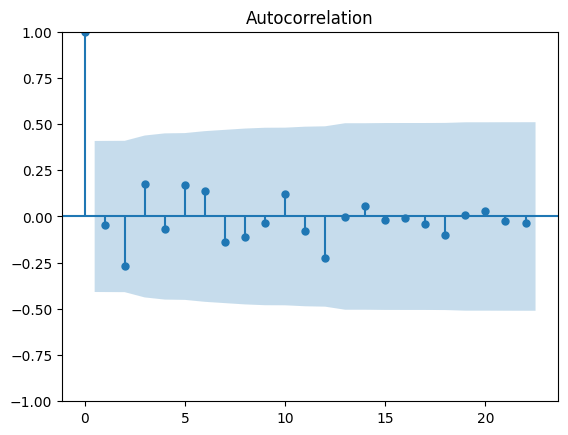

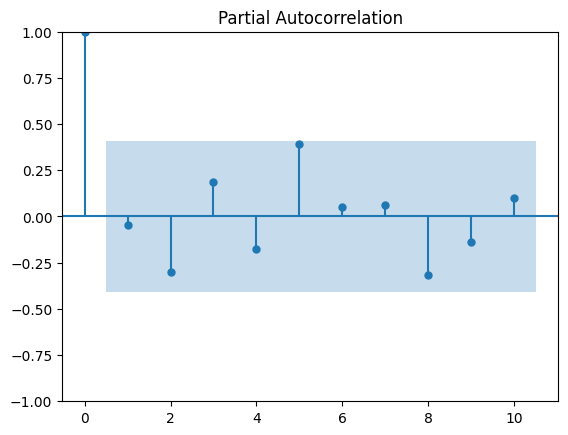

In [44]:
# checking the stationarity of training data and printing the ACF and PACF of the residuals

model = pm.auto_arima(train['Producer Price Inflation'], seasonal=True, m=12, trace=True)

# print the optimal order of the ARIMA model
print(model.order)

# plot ACF and PACF of the residuals
residuals = SARIMAX(train['Producer Price Inflation'], order=model.order, seasonal_order=(0,0,0,0)).fit().resid
plot_acf(residuals, lags=22)
plot_pacf(residuals, lags=10)
plt.show()

Creating a SARIMAX model with order(1,1,1) and fitting the training data into the model

In [45]:
model1 = SARIMAX(train['Producer Price Inflation'],order=(1,1,1), seasonal_order=(0,0,0,12))
model1=model1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:     Producer Price Inflation   No. Observations:                   23
Model:                     SARIMAX(1, 1, 1)   Log Likelihood                 -64.458
Date:                      Fri, 12 May 2023   AIC                            134.916
Time:                              08:00:51   BIC                            138.190
Sample:                          01-01-1970   HQIC                           135.687
                               - 01-01-1992                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7582      0.571      1.327      0.185      -0.362       1.878
ma.L1         -0.9993     55.486     -0.018      0.986    -109.751     107.752
sigma2        19.2852   1063.105      0.018      0.986   -2064.363    2102.933
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                16.30
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                             1.32
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
# using the created model for predicting the inflation rate for test dataset

start = len(train)
end=len(train)+len(test)-1
pred = model1.predict(start=start, end=end, type='levels')
print(pred)

1993-01-01    4.379669
1994-01-01    5.334726
1995-01-01    6.058832
1996-01-01    6.607835
1997-01-01    7.024079
1998-01-01    7.339668
1999-01-01    7.578941
2000-01-01    7.760353
2001-01-01    7.897896
2002-01-01    8.002179
2003-01-01    8.081244
2004-01-01    8.141190
2005-01-01    8.186640
2006-01-01    8.221099
2007-01-01    8.247225
2008-01-01    8.267034
2009-01-01    8.282052
2010-01-01    8.293439
2011-01-01    8.302072
2012-01-01    8.308617
2013-01-01    8.313580
2014-01-01    8.317342
2015-01-01    8.320195
2016-01-01    8.322358
2017-01-01    8.323998
2018-01-01    8.325241
2019-01-01    8.326184
2020-01-01    8.326899
2021-01-01    8.327440
2022-01-01    8.327851
Freq: AS-JAN, Name: predicted_mean, dtype: float64


Using Decision Tree and Neural network model for predicting the series of the inflation by classification method.

In [47]:
# Label Encoding the series variable for better model training and classification

le = LabelEncoder()
data = df1
data['Series Name'] = le.fit_transform(data['Series Name'])

Decision Tree Classification method

In [48]:

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Country Code', 'IMF Country Code', 'Country', 'Series Name','Note'], axis=1), data['Series Name'], test_size=0.3, random_state=42)

# create decision tree classifier object
clf = DecisionTreeClassifier()

# fit the classifier to the training data
clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = clf.predict(X_test)



Neural Network method - MLP classifier

In [49]:

# Initialize the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)

# Fit the classifier to the training data
mlp.fit(X_train, y_train)

# Make predictions on the testing data
y_pred1 = mlp.predict(X_test)


Using SARIMAX model for forecasting the inflation rate of UK for next 5 years.

In [50]:
uk1 = uk
uk1['Energy Consumer Price Inflation'] = pd.to_numeric(uk1['Energy Consumer Price Inflation'],errors = 'coerce')
uk1['Food Consumer Price Inflation'] = pd.to_numeric(uk1['Food Consumer Price Inflation'],errors = 'coerce')
uk1['Headline Consumer Price Inflation'] = pd.to_numeric(uk1['Headline Consumer Price Inflation'],errors = 'coerce')
uk1['Official Core Consumer Price Inflation'] = pd.to_numeric(uk1['Official Core Consumer Price Inflation'],errors = 'coerce')
uk1['Producer Price Inflation'] = pd.to_numeric(uk1['Producer Price Inflation'],errors = 'coerce')
uk1.fillna(uk1.mean(),inplace=True)

<ipython-input-50-0351cfdde138>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk1['Energy Consumer Price Inflation'] = pd.to_numeric(uk1['Energy Consumer Price Inflation'],errors = 'coerce')
<ipython-input-50-0351cfdde138>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk1['Food Consumer Price Inflation'] = pd.to_numeric(uk1['Food Consumer Price Inflation'],errors = 'coerce')
<ipython-input-50-0351cfdde138>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [51]:
# creating a list for the forecasted data of the state space model to add to the dataframe

inflation = []

# Define state space model

model = SARIMAX(uk['Producer Price Inflation'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
  
  # Estimate model using maximum likelihood estimation
  
result = model.fit()

  # Forecast inflation for next 5 years

a = result.forecast(steps=5)

a=a.T
inflation.append(a.tolist())

model = SARIMAX(uk['Energy Consumer Price Inflation'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
  
  # Estimate model using maximum likelihood estimation
  
result = model.fit()

  # Forecast inflation for next 5 years

a = result.forecast(steps=5)

a=a.T
inflation.append(a.tolist())

model = SARIMAX(uk['Food Consumer Price Inflation'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
  
  # Estimate model using maximum likelihood estimation
  
result = model.fit()

  # Forecast inflation for next 5 years

a = result.forecast(steps=5)

a=a.T
inflation.append(a.tolist())

model = SARIMAX(uk['Headline Consumer Price Inflation'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
  
  # Estimate model using maximum likelihood estimation
  
result = model.fit()

  # Forecast inflation for next 5 years

a = result.forecast(steps=5)

a=a.T
inflation.append(a.tolist())

model = SARIMAX(uk['Official Core Consumer Price Inflation'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
  
  # Estimate model using maximum likelihood estimation
  
result = model.fit()

  # Forecast inflation for next 5 years

a = result.forecast(steps=5)

a=a.T
inflation.append(a.tolist())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa

In [52]:
inflation

[[14.438209929043557,
  8.662545517219966,
  8.344788575069874,
  2.6754069358980814,
  3.0383221424571554],
 [59.19976841769464,
  51.68380228499512,
  54.188116682439876,
  51.028747866930175,
  51.681097015983326],
 [9.831761571466057,
  6.649390229233804,
  7.395756715599629,
  3.2978399641696456,
  2.4877930313532817],
 [8.243164694832515,
  5.599203366378232,
  5.093784126327606,
  3.6275102110244557,
  3.250030817074829],
 [5.522930412480923,
  3.6774273586615385,
  3.6677430839219305,
  2.6893830353528037,
  1.8661131015503716]]

# Task 2.4:

 **Visualisations of the key results**

In [53]:
# Finding accuracy of SARIMAX model

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test['Producer Price Inflation'], pred)
mae = mean_absolute_error(test['Producer Price Inflation'], pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 47.99874445021144
Mean Absolute Error: 5.929398858541501


In [54]:
# calculate the accuracy of the Decision tree model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of Decision tree:", accuracy)

# Print the classification report of Neural network model
print("\nAccuracy of Neural network\n")
print(classification_report(y_test, y_pred1))

Accuracy of Decision tree: 0.39574468085106385

Accuracy of Neural network

              precision    recall  f1-score   support

           0       0.57      0.37      0.45        57
           1       0.42      0.47      0.44        51
           2       0.38      0.38      0.38        60
           3       0.36      0.44      0.39        34
           4       0.38      0.45      0.42        33

    accuracy                           0.42       235
   macro avg       0.42      0.42      0.42       235
weighted avg       0.43      0.42      0.42       235



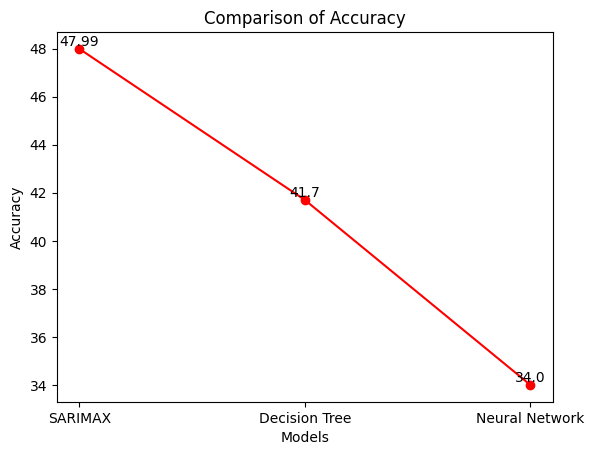

In [55]:
# creating lists to plot the accuracy of each model

x= ['SARIMAX','Decision Tree','Neural Network']
y= [47.99,41.70,34.00]

fig, ax = plt.subplots()

# set x-axis and y-axis labels
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')

# set title
ax.set_title('Comparison of Accuracy')

# plot the data
ax.plot(x, y, marker='o', color='red')

for i, j in zip(x, y):
    ax.annotate(str(j), xy=(i, j), ha='center', va='bottom')

# show the plot
plt.show()

The above graph shows that the SARIMAX model predicts the inflation rate with average accuracy and the other two models classifies the series with average accuracy with limited data.

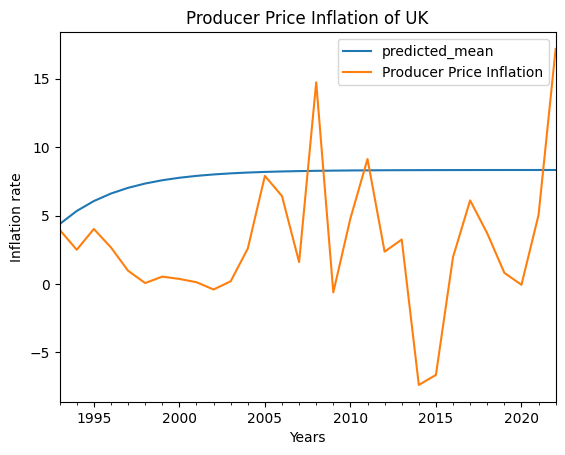

In [56]:
# plotting the predicted and Actual inflation rate

pred.plot(legend=True)
test['Producer Price Inflation'].plot(legend = True)
plt.title("Producer Price Inflation of UK")
plt.xlabel("Years")
plt.ylabel("Inflation rate")
plt.show()

In [57]:
# the forecasted data for 5 years is added to the original dataset for plotting the inflation rate from 1970 to 2027
a1 = np.array(inflation)
a1=a1.T
a2 = np.concatenate((uk1, a1), axis=0)
print(a2)

[[ 6.37        5.7         6.9        -3.41356039  7.05      ]
 [ 9.44       10.4        11.47        9.11        9.01      ]
 [ 7.07        7.8         8.92        6.83        5.17      ]
 [ 9.2         2.8        15.37        8.62        7.49      ]
 [16.04       26.4        18.02       13.83       22.28      ]
 [24.21       33.2        24.97       22.05       22.91      ]
 [16.56       23.7        19.85       15.5        16.51      ]
 [15.84       15.8        18.79       15.5        18.95      ]
 [ 8.26        7.7         7.81        9.6         8.99      ]
 [13.42       10.1        12.62       13.21       11.82      ]
 [17.97       25.         13.56       18.23       15.91      ]
 [11.88       21.3         8.69       11.11       10.72      ]
 [ 8.6        14.          7.76        8.21        8.52      ]
 [ 4.61        7.4         3.67        4.42        6.5       ]
 [ 4.96        2.9         5.88        5.22        5.94      ]
 [ 6.07        8.6         4.02        6.86        6.22

In [58]:
# creating a time stamped dataframe for better visualization

uk_f= pd.DataFrame(a2)
periods = pd.period_range(start=1970, end=2027, freq='A')
uk_f.index = periods
uk_f.index = uk_f.index.to_timestamp()
uk_f

0          1          2          3          4
1970-01-01   6.370000   5.700000   6.900000  -3.413560   7.050000
1971-01-01   9.440000  10.400000  11.470000   9.110000   9.010000
1972-01-01   7.070000   7.800000   8.920000   6.830000   5.170000
1973-01-01   9.200000   2.800000  15.370000   8.620000   7.490000
1974-01-01  16.040000  26.400000  18.020000  13.830000  22.280000
1975-01-01  24.210000  33.200000  24.970000  22.050000  22.910000
1976-01-01  16.560000  23.700000  19.850000  15.500000  16.510000
1977-01-01  15.840000  15.800000  18.790000  15.500000  18.950000
1978-01-01   8.260000   7.700000   7.810000   9.600000   8.990000
1979-01-01  13.420000  10.100000  12.620000  13.210000  11.820000
1980-01-01  17.970000  25.000000  13.560000  18.230000  15.910000
1981-01-01  11.880000  21.300000   8.690000  11.110000  10.720000
1982-01-01   8.600000  14.000000   7.760000   8.210000   8.520000
1983-01-01   4.610000   7.400000   3.670000   4.420000   6.500000
1984-01-01   4.960000   2.900000   5.880000   5.220000   5.940000
1985-01-01   6.070000   8.600000   4.020000   6.860000   6.220000
1986-01-01   3.430000  -2.700000   3.330000   4.530000   1.330000
1987-01-01   4.150000  -0.100000   3.130000   4.800000   3.430000
1988-01-01   4.210000   2.500000   3.370000   5.590000   3.680000
1989-01-01   5.810000   7.330000   5.620000   8.300000   4.780000
1990-01-01   8.040000  10.920000   8.060000   9.700000   6.250000
1991-01-01   7.440000   8.110000   5.280000   5.790000   5.340000
1992-01-01   4.560000   5.680000   2.140000   4.110000   3.120000
1993-01-01   2.580000   2.800000   1.660000   1.390000   3.960000
1994-01-01   2.200000   3.330000   0.860000   2.510000   2.500000
1995-01-01   2.620000   3.150000   3.650000   3.330000   4.020000
1996-01-01   2.850000   4.030000   3.160000   2.150000   2.670000
1997-01-01   2.190000   2.980000  -0.170000   1.880000   0.970000
1998-01-01   1.860000   2.280000   1.030000   1.440000   0.070000
1999-01-01   1.820000   2.830000   0.250000   0.740000   0.540000
2000-01-01   1.100000   2.120000  -0.480000   0.080000   0.370000
2001-01-01   1.630000   2.610000   3.760000   1.070000   0.130000
2002-01-01   1.470000   2.400000   0.820000   1.480000  -0.400000
2003-01-01   1.320000   1.610000   1.290000   1.280000   0.200000
2004-01-01   1.430000   2.120000   0.790000   1.070000   2.590000
2005-01-01   2.060000   3.290000   1.520000   1.440000   7.900000
2006-01-01   2.520000   4.670000   2.400000   1.700000   6.420000
2007-01-01   2.330000   3.410000   4.510000   1.900000   1.600000
2008-01-01   3.480000   4.700000   9.160000   1.900000  14.730000
2009-01-01   1.970000   2.180000   5.470000   1.600000  -0.610000
2010-01-01   2.500000  -0.360000   3.420000   2.000000   4.790000
2011-01-01   3.880000   2.710000   5.500000   2.800000   9.130000
2012-01-01   2.560000   2.720000   3.250000   2.100000   2.360000
2013-01-01   2.290000   2.350000   3.730000   1.900000   3.250000
2014-01-01   1.430000   2.000000  -0.190000   1.600000  -7.370000
2015-01-01   0.400000   1.250000  -2.580000   1.300000  -6.640000
2016-01-01   1.000000   1.680000  -2.380000   1.600000   1.970000
2017-01-01   2.680000   2.040000   2.250000   2.300000   6.110000
2018-01-01   2.320000   1.860000   2.080000   1.900000   3.700000
2019-01-01   1.790000   2.080000  10.930000   1.700000   0.820000
2020-01-01   0.990000   0.880000   0.720000   1.500000  -0.060000
2021-01-01   2.500000   9.110000   0.300000   2.300000   5.040000
2022-01-01   7.900000  46.180000  10.350000   5.260000  17.170000
2023-01-01  14.438210  59.199768   9.831762   8.243165   5.522930
2024-01-01   8.662546  51.683802   6.649390   5.599203   3.677427
2025-01-01   8.344789  54.188117   7.395757   5.093784   3.667743
2026-01-01   2.675407  51.028748   3.297840   3.627510   2.689383
2027-01-01   3.038322  51.681097   2.487793   3.250031   1.866113

In [59]:
df1[df1['Country'] == 'United Kingdom']

Country Code  IMF Country Code         Country  Series Name     1970  \
62           GBR             112.0  United Kingdom            2  6.37000   
260          GBR             112.0  United Kingdom            0  5.70000   
434          GBR             112.0  United Kingdom            1  6.90000   
586          GBR             112.0  United Kingdom            3 -3.41356   
705          GBR             112.0  United Kingdom            4  7.05000   

      1971  1972   1973   1974   1975  ...  2014  2015  2016  2017  2018  \
62    9.44  7.07   9.20  16.04  24.21  ...  1.43  0.40  1.00  2.68  2.32   
260  10.40  7.80   2.80  26.40  33.20  ...  2.00  1.25  1.68  2.04  1.86   
434  11.47  8.92  15.37  18.02  24.97  ... -0.19 -2.58 -2.38  2.25  2.08   
586   9.11  6.83   8.62  13.83  22.05  ...  1.60  1.30  1.60  2.30  1.90   
705   9.01  5.17   7.49  22.28  22.91  ... -7.37 -6.64  1.97  6.11  3.70   

      2019  2020  2021   2022  \
62    1.79  0.99  2.50   7.90   
260   2.08  0.88  9.11  46.18   
434  10.93  0.72  0.30  10.35   
586   1.70  1.50  2.30   5.26   
705   0.82 -0.06  5.04  17.17   

                                                  Note  
62                            Annual average inflation  
260      Housing, Water, Electricity, Gas & Other Fuel  
434                     Food and non-acoholic beverage  
586  All Items Excluding ex Reg Pr & Fuel for Veh &...  
705              Producer Price Index, All Commodities  

[5 rows x 58 columns]

In [60]:
# renaming the columns to series names

uk_f = uk_f.rename(columns={0:'Headline Consumer Price Inflation',1: 'Energy Consumer Price Inflation',2:'Food Consumer Price Inflation',3:'Official Core Consumer Price Inflation',4:'Producer Price Inflation'})

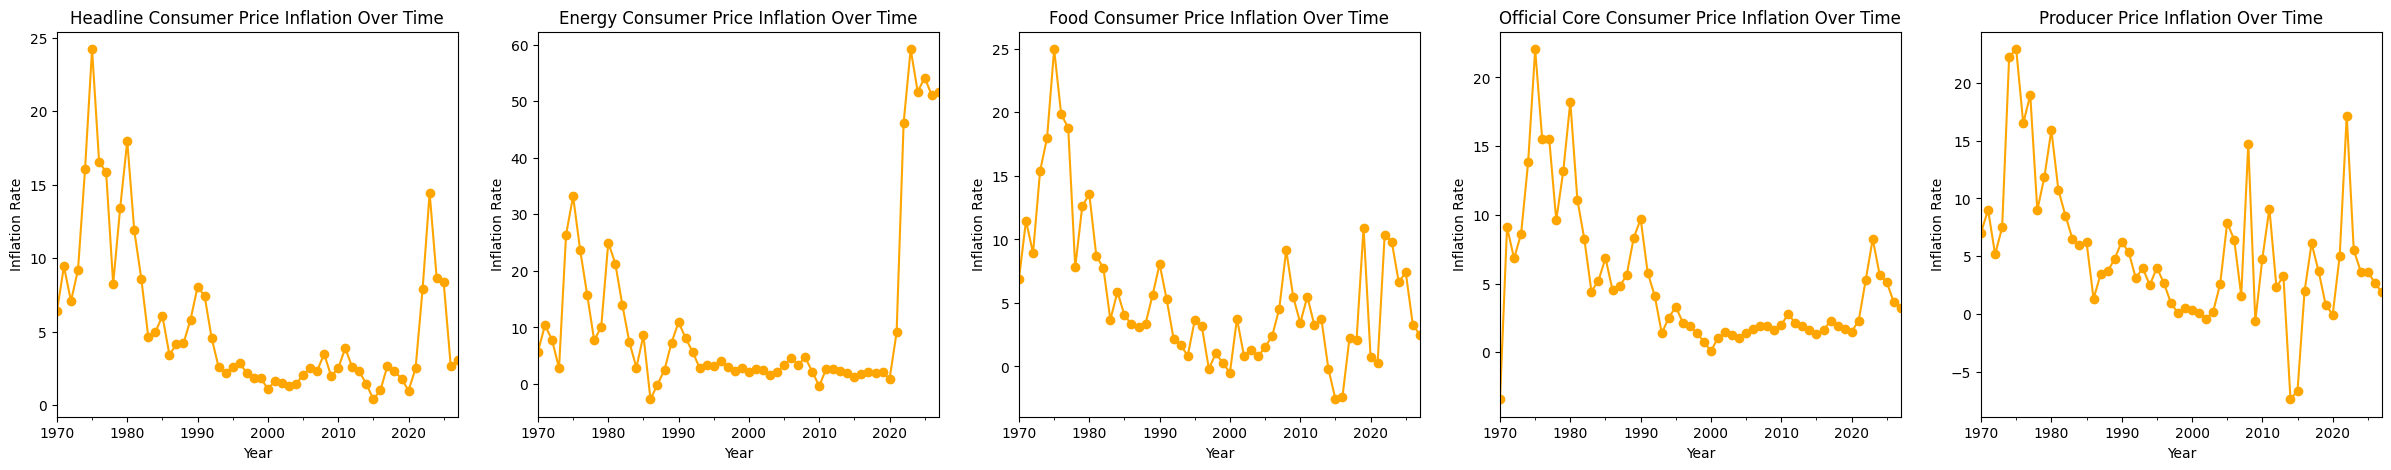

In [61]:
# plotting the forecasted inflation dataset of UK using subplot and line chart

plt.figure(figsize=(30,5))

plt.subplot(1,5,1)
uk_f['Headline Consumer Price Inflation'].plot(marker='o', color='orange')
plt.title('Headline Consumer Price Inflation Over Time')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')


plt.subplot(1,5,2)
uk_f['Energy Consumer Price Inflation'].plot(marker='o', color='orange')
plt.title('Energy Consumer Price Inflation Over Time')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')


plt.subplot(1,5,3)
uk_f['Food Consumer Price Inflation'].plot(marker='o', color='orange')
plt.title('Food Consumer Price Inflation Over Time')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')


plt.subplot(1,5,4)
uk_f['Official Core Consumer Price Inflation'].plot(marker='o', color='orange')
plt.title('Official Core Consumer Price Inflation Over Time')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')


plt.subplot(1,5,5)
uk_f['Producer Price Inflation'].plot(marker='o', color='orange')
plt.title('Producer Price Inflation Over Time')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')

plt.show()



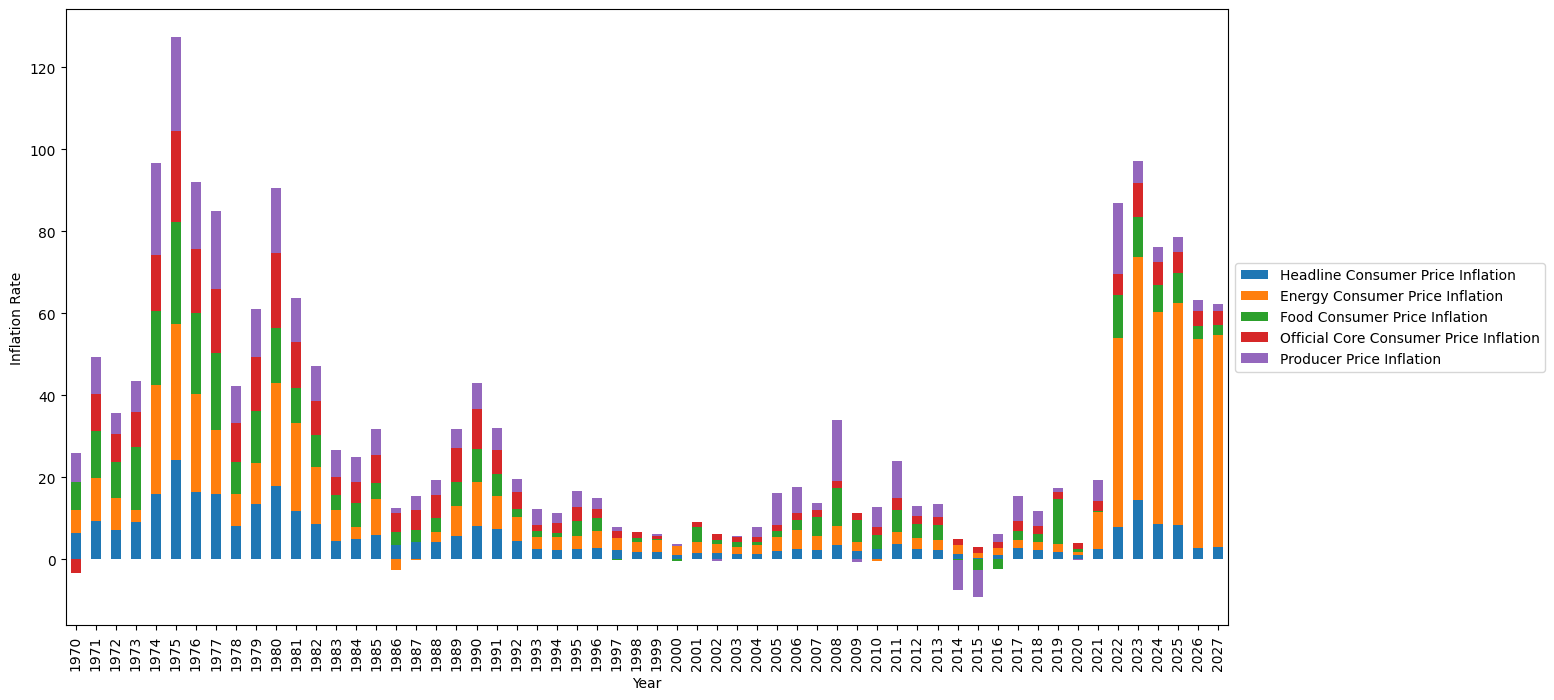

In [62]:
# finding the inflation rate in each series of Uk to check the which series has more inflation rate

cols = uk_f.columns
ax = uk_f[cols].plot(kind='bar', stacked=True, figsize=(15, 8))
ax.set_ylabel('Inflation Rate')
ax.set_xlabel('Year')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
xticks = [tick.strftime('%Y') for tick in uk_f.index]
ax.set_xticks(range(uk_f.shape[0]))
ax.set_xticklabels(xticks)
plt.show()

The forecasted inflation data of UK using SARIMAX shows that, the Energy Consumer price will be facing high inflation in the future compared to other inflation types. And UK will be facing high inflation in all areas in 2023 similar to 1974, which shows that they have to plan better to face the inflation and to overcome it in the near infuture.